# HOTEL RESERVATION - CANCEL OR HONOR THE BOOKINGS?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

In [2]:
df = pd.read_csv('Hotel Reservations.csv', index_col=0)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
Booking_ID,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36275 entries, INN00001 to INN36275
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_seg

In [4]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


# GENERAL ANALYSIS

Generally, data has total 36,275 rows which means 36,275 booking

/var/folders/gs/d8w516c51d134fkypk2vqbg40000gn/T/ipykernel_55500/1281597221.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

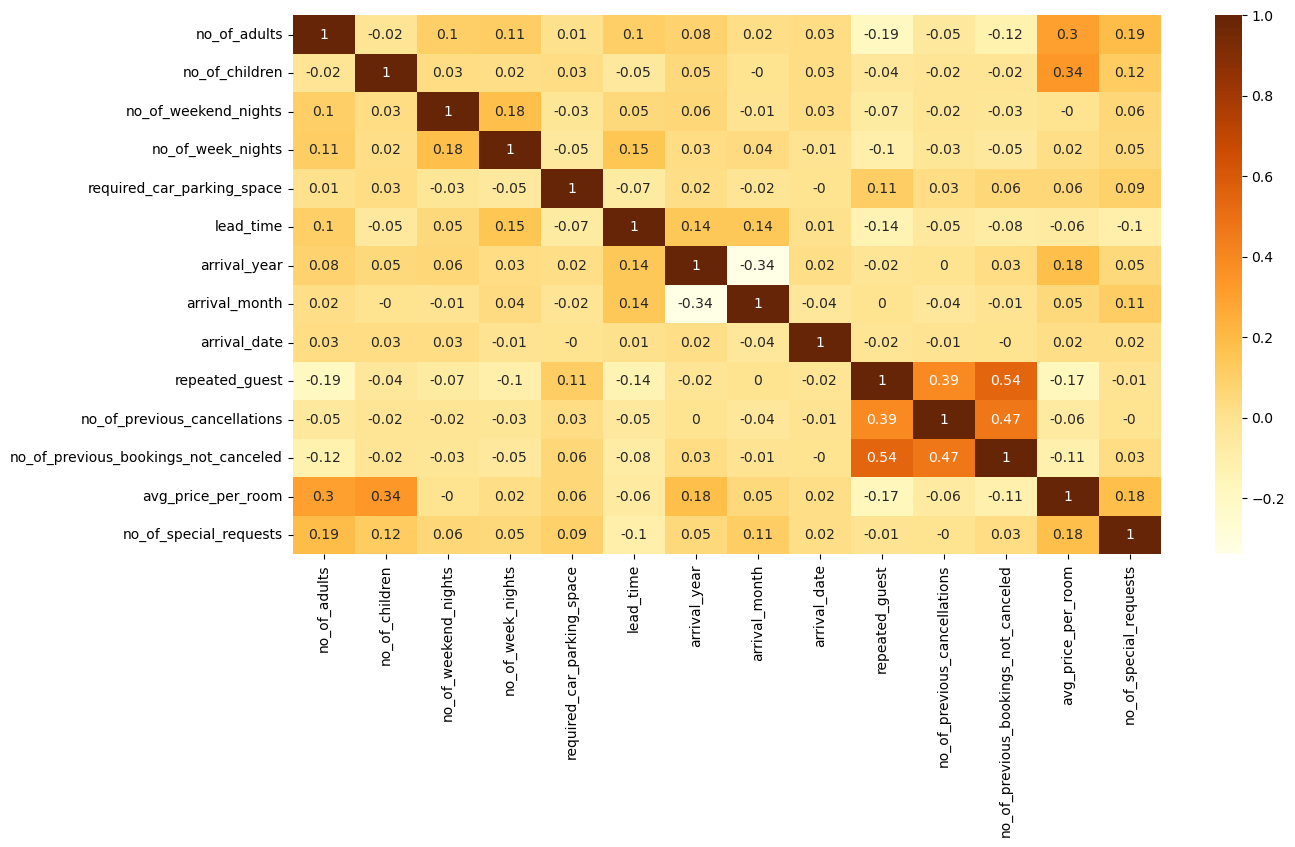

In [5]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap ='YlOrBr')

*Depends on heatmap, there is not much correlation between variables

## CATEGORY VARIABLES

<Axes: title={'center': 'Variable room_type_reserved'}, xlabel='room_type_reserved', ylabel='count'>

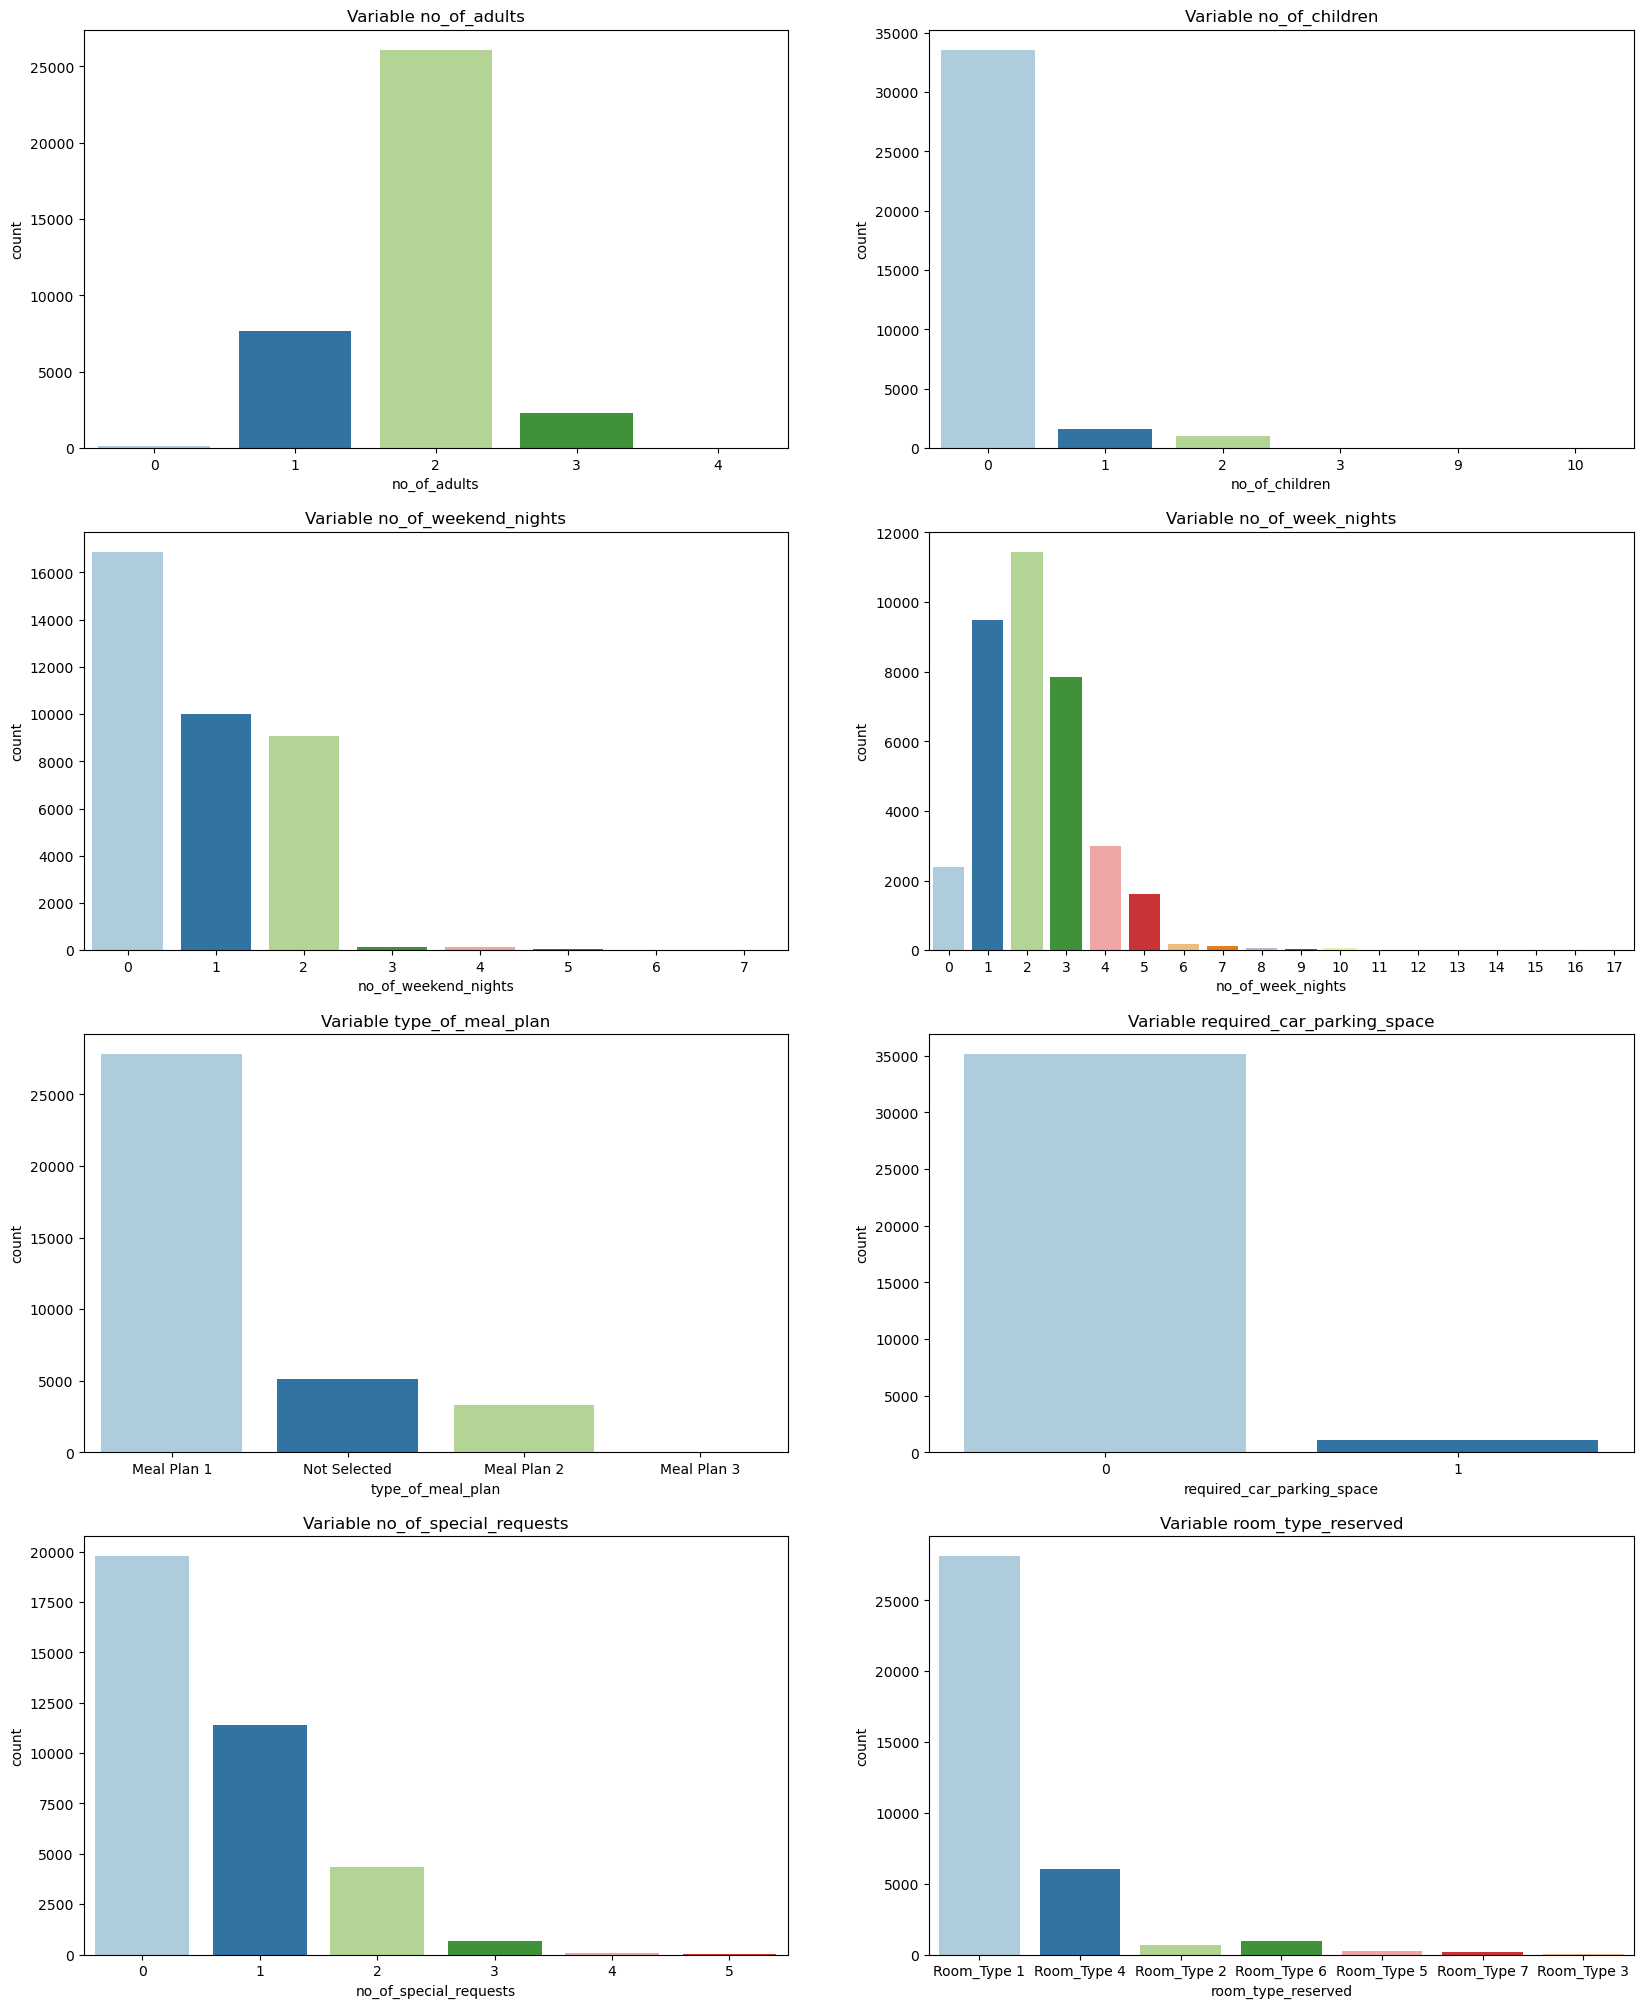

In [6]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Variable no_of_adults')
sns.countplot(x = 'no_of_adults', data = df, palette = 'Paired')

plt.subplot(4,2,2)
plt.gca().set_title('Variable no_of_children')
sns.countplot(x = 'no_of_children', data = df, palette = 'Paired')

plt.subplot(4,2,3)
plt.gca().set_title('Variable no_of_weekend_nights')
sns.countplot(x = 'no_of_weekend_nights', data = df, palette = 'Paired')

plt.subplot(4,2,4)
plt.gca().set_title('Variable no_of_week_nights')
sns.countplot(x = 'no_of_week_nights', data = df, palette = 'Paired')

plt.subplot(4,2,5)
plt.gca().set_title('Variable type_of_meal_plan')
sns.countplot(x = 'type_of_meal_plan', data = df, palette = 'Paired')

plt.subplot(4,2,6)
plt.gca().set_title('Variable required_car_parking_space')
sns.countplot(x = 'required_car_parking_space', data = df, palette = 'Paired')

plt.subplot(4,2,7)
plt.gca().set_title('Variable no_of_special_requests')
sns.countplot(x = 'no_of_special_requests', data = df, palette = 'Paired')

plt.subplot(4,2,8)
plt.gca().set_title('Variable room_type_reserved')
sns.countplot(x = 'room_type_reserved', data = df, palette = 'Paired')

<Axes: title={'center': 'Variable no_of_previous_cancellations'}, xlabel='no_of_previous_cancellations', ylabel='count'>

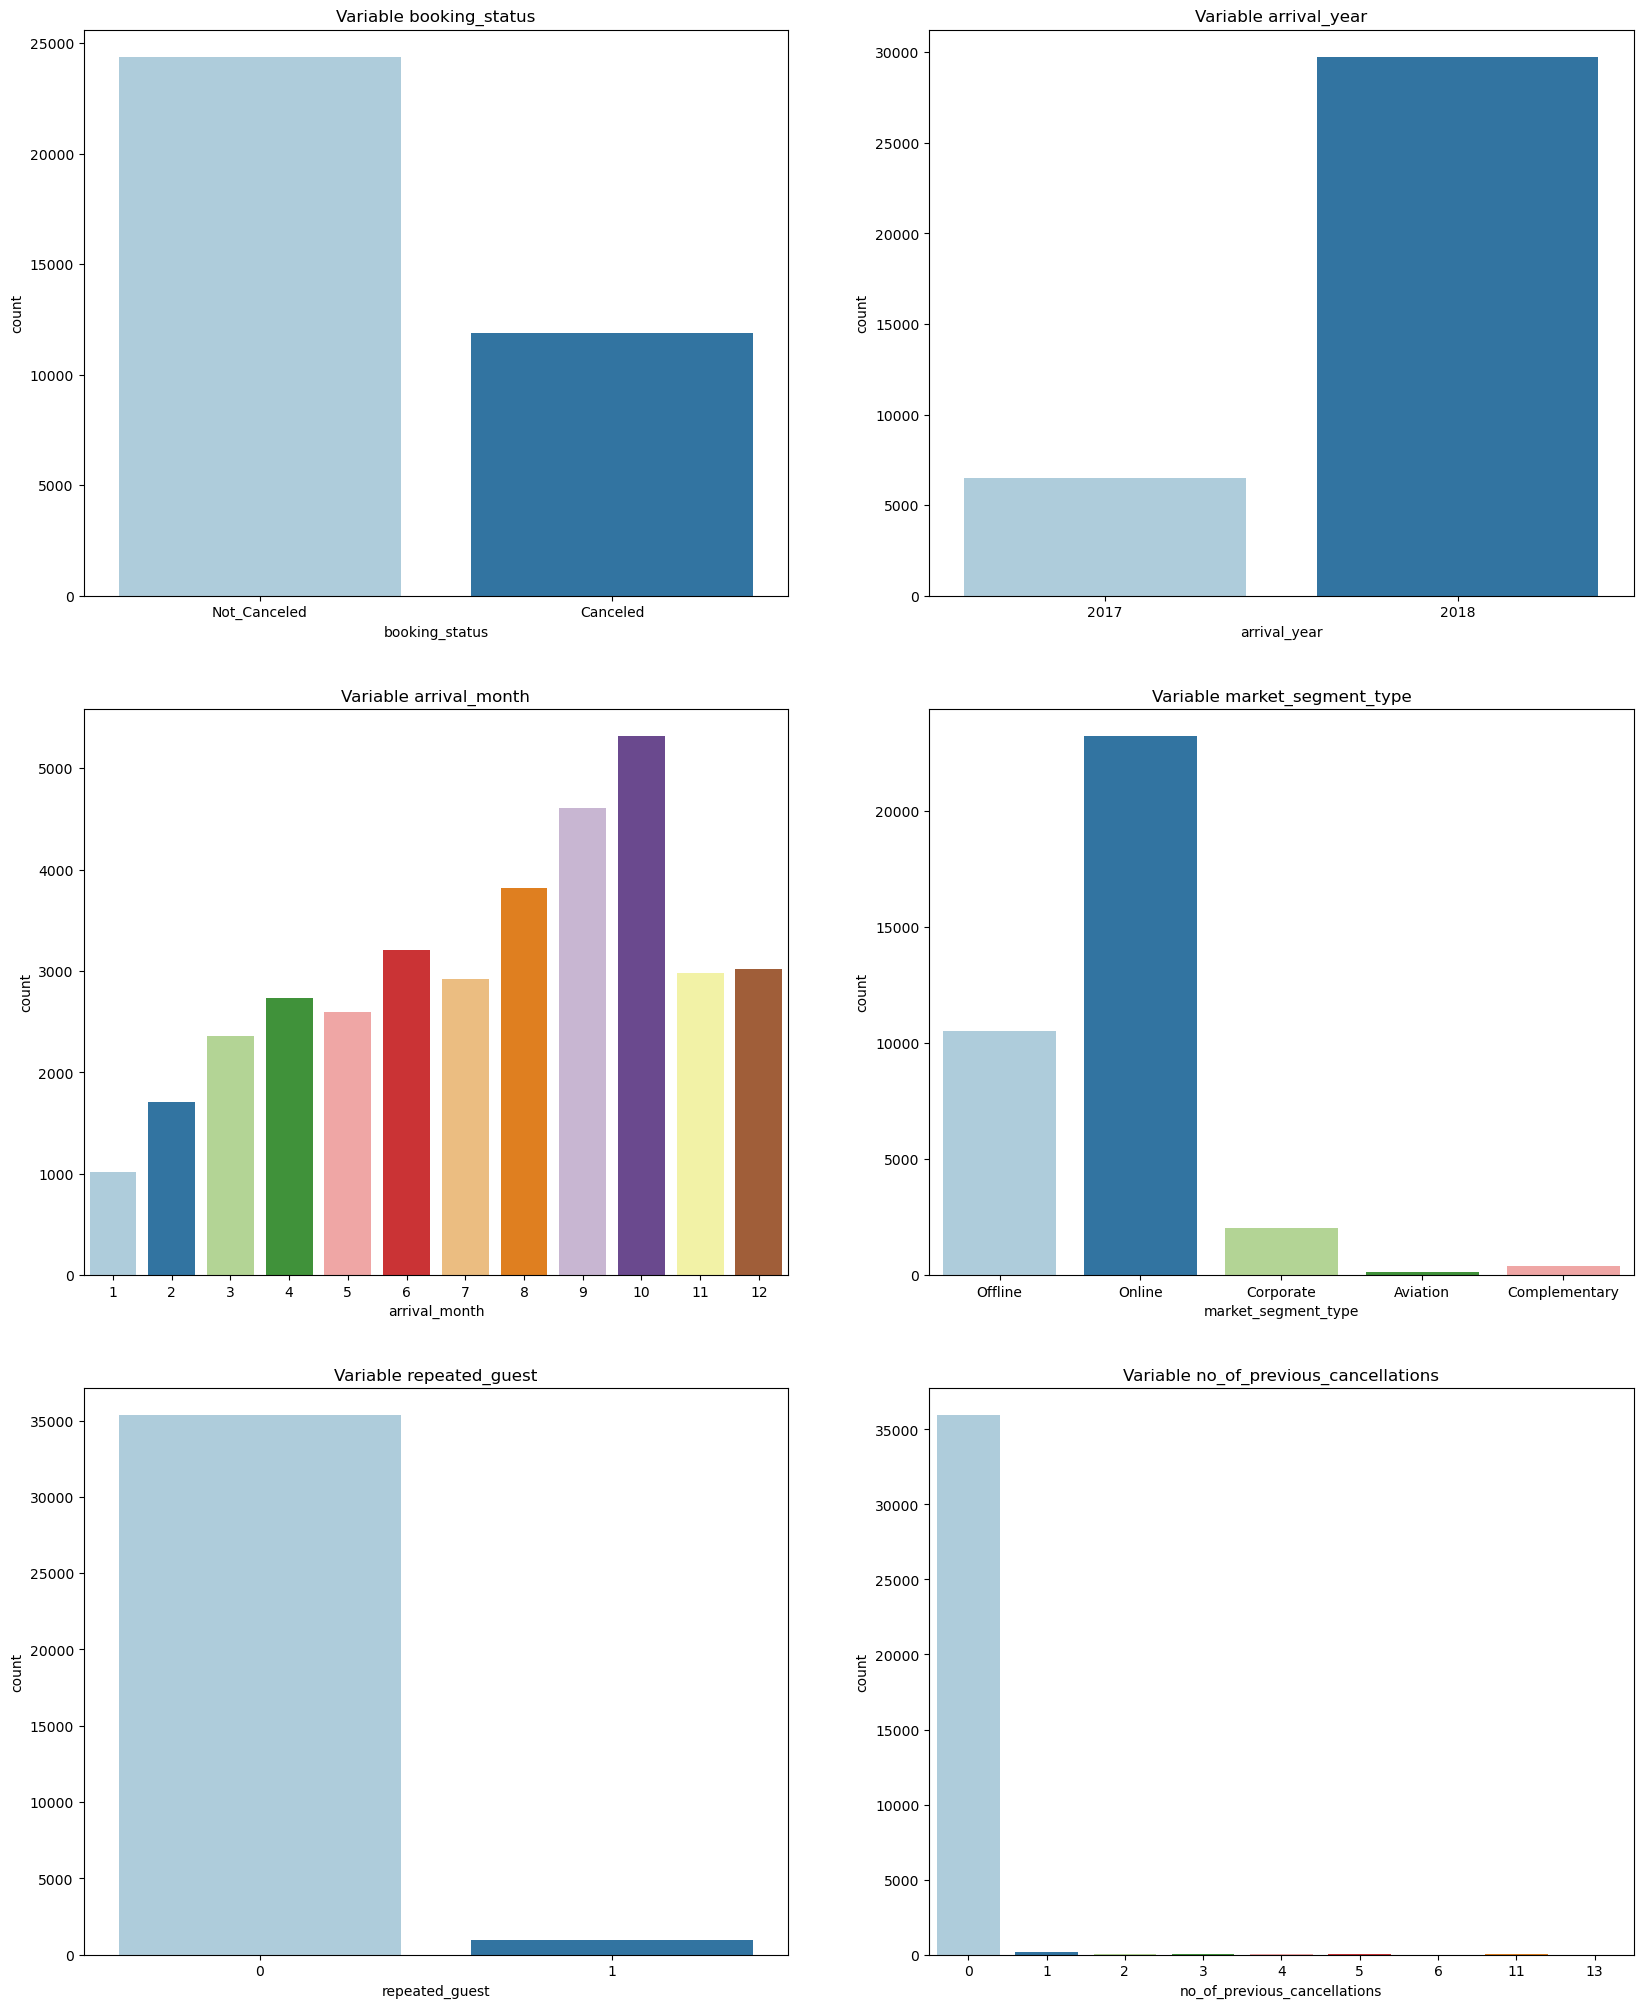

In [7]:
plt.figure(figsize = (20,25))

plt.subplot(3,2,1)
plt.gca().set_title('Variable booking_status')
sns.countplot(x = 'booking_status',data = df, palette = 'Paired')

plt.subplot(3,2,2)
plt.gca().set_title('Variable arrival_year')
sns.countplot(x = 'arrival_year', data = df, palette = 'Paired')

plt.subplot(3,2,3)
plt.gca().set_title('Variable arrival_month')
sns.countplot(x = 'arrival_month', data = df, palette = 'Paired')

plt.subplot(3,2,4)
plt.gca().set_title('Variable market_segment_type')
sns.countplot(x = 'market_segment_type', data = df, palette = 'Paired')

plt.subplot(3,2,5)
plt.gca().set_title('Variable repeated_guest')
sns.countplot(x = 'repeated_guest', data = df, palette = 'Paired')

plt.subplot(3,2,6)
plt.gca().set_title('Variable no_of_previous_cancellations')
sns.countplot(x = 'no_of_previous_cancellations', data = df, palette = 'Paired')

<Axes: title={'center': 'Variable avg_price_per_room'}, xlabel='avg_price_per_room', ylabel='Count'>

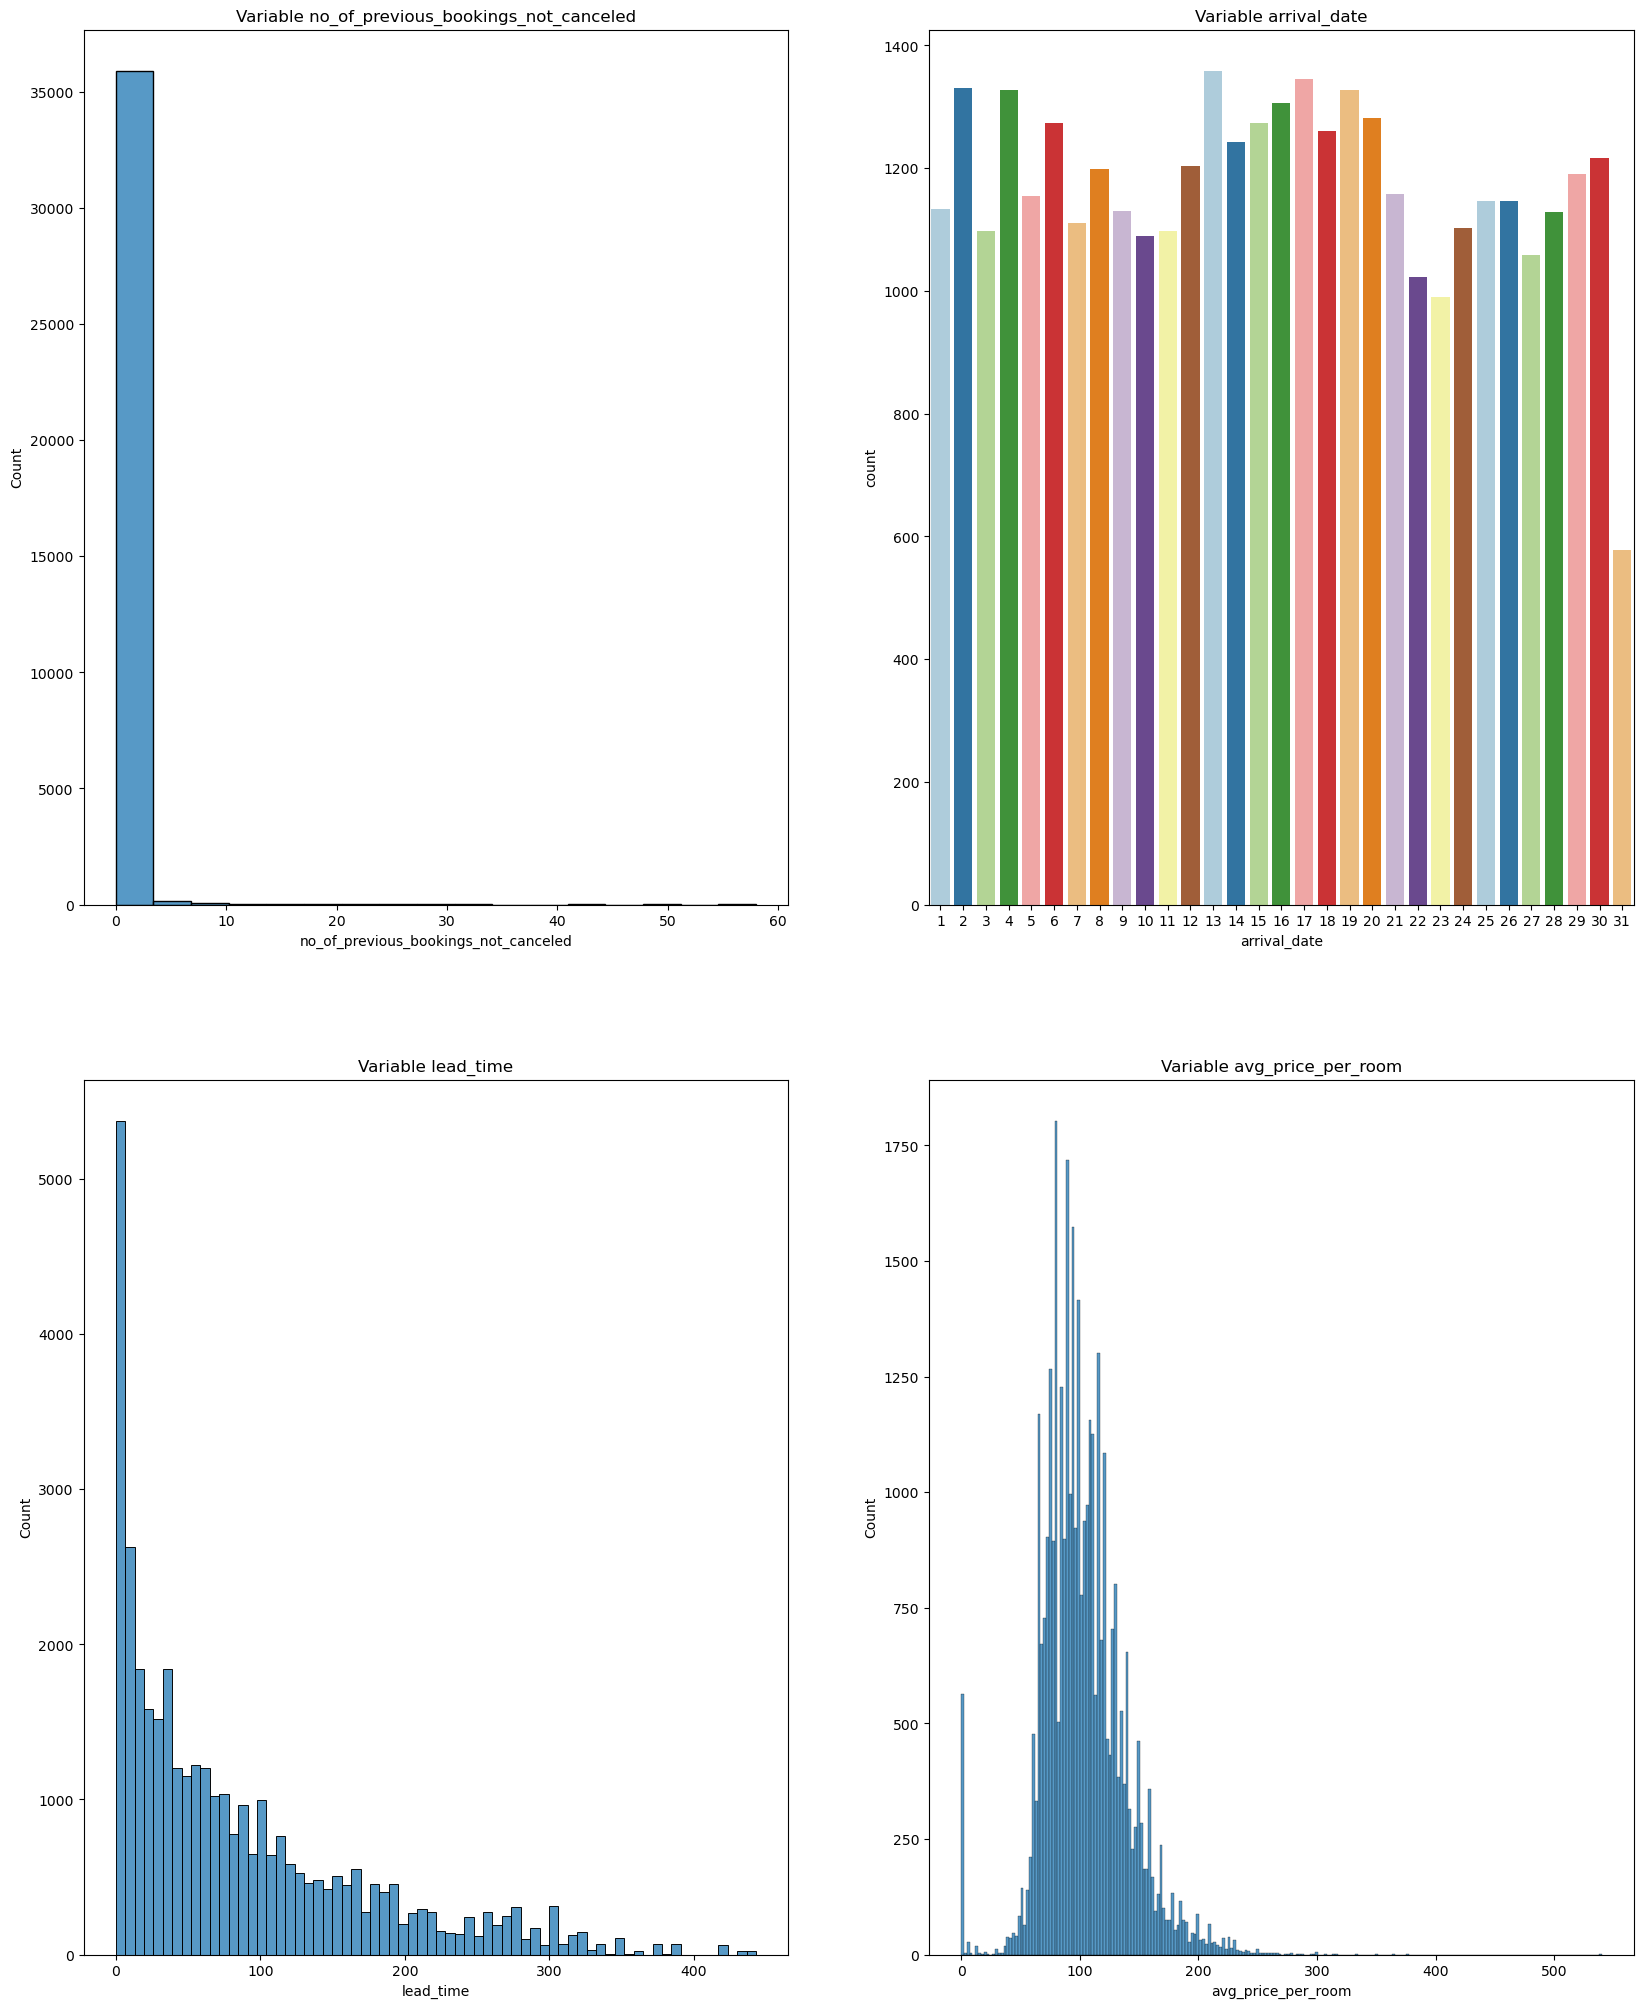

In [8]:
plt.figure(figsize = (20,25))

plt.subplot(2,2,3)
plt.gca().set_title('Variable lead_time')
sns.histplot(df['lead_time'])

plt.subplot(2,2,2)
plt.gca().set_title('Variable arrival_date')
sns.countplot(x = 'arrival_date', data = df, palette = 'Paired')

plt.subplot(2,2,1)
plt.gca().set_title('Variable no_of_previous_bookings_not_canceled')
sns.histplot(df['no_of_previous_bookings_not_canceled'])

plt.subplot(2,2,4)
plt.gca().set_title('Variable avg_price_per_room')
sns.histplot(df['avg_price_per_room'])

<Axes: title={'center': 'Variable avg_price_per_room'}>

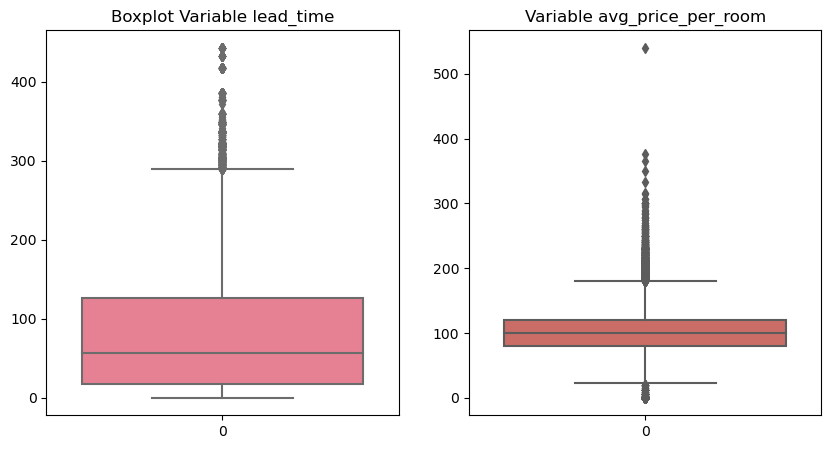

In [9]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
plt.gca().set_title('Boxplot Variable lead_time')
sns.boxplot(df['lead_time'], palette = ('husl'))

plt.subplot(1,2,2)
plt.gca().set_title('Variable avg_price_per_room')
sns.boxplot(df['avg_price_per_room'], palette = 'hls')

-Looking through the chart of some variables the data gave us we can see:
		+  Almost guests made room for 2 adults and no kid
        
		+ Number of nights they booked around 1-3 week nights and almost them didnt have much nights reserving room on weekend just around 1-2 nights
        
		+ About some request, they keen on ‘Meal Plan 1’, would like to have car parking space and half of them dont have special request (highfloor, non-smoking room)
        
		+ Most of our guest have never been to hotel before who rarely cancelled the bookings
        
		+ Room type 1 is the best seller, on the 2nd is roomtype 4 with Online is the main market segment. Most of our booking is on 2018. In the ‘Arrival Month’ chart, we can see an increase, from Jan to Oct the booking gradually increased and Oct is the ‘rush’ month of the hotel, beside that we see the drop from Nov and Dec
        
		+ Depends on target variable, we can see that the approximately percentage of booking have not been cancelled is 67%
        
By the way, the less request we have, the less data for us to have exactly analysis

## ANALYSIS BOOKING STATUS

<Axes: title={'center': 'ABS room_type_reserved'}, xlabel='booking_status', ylabel='count'>

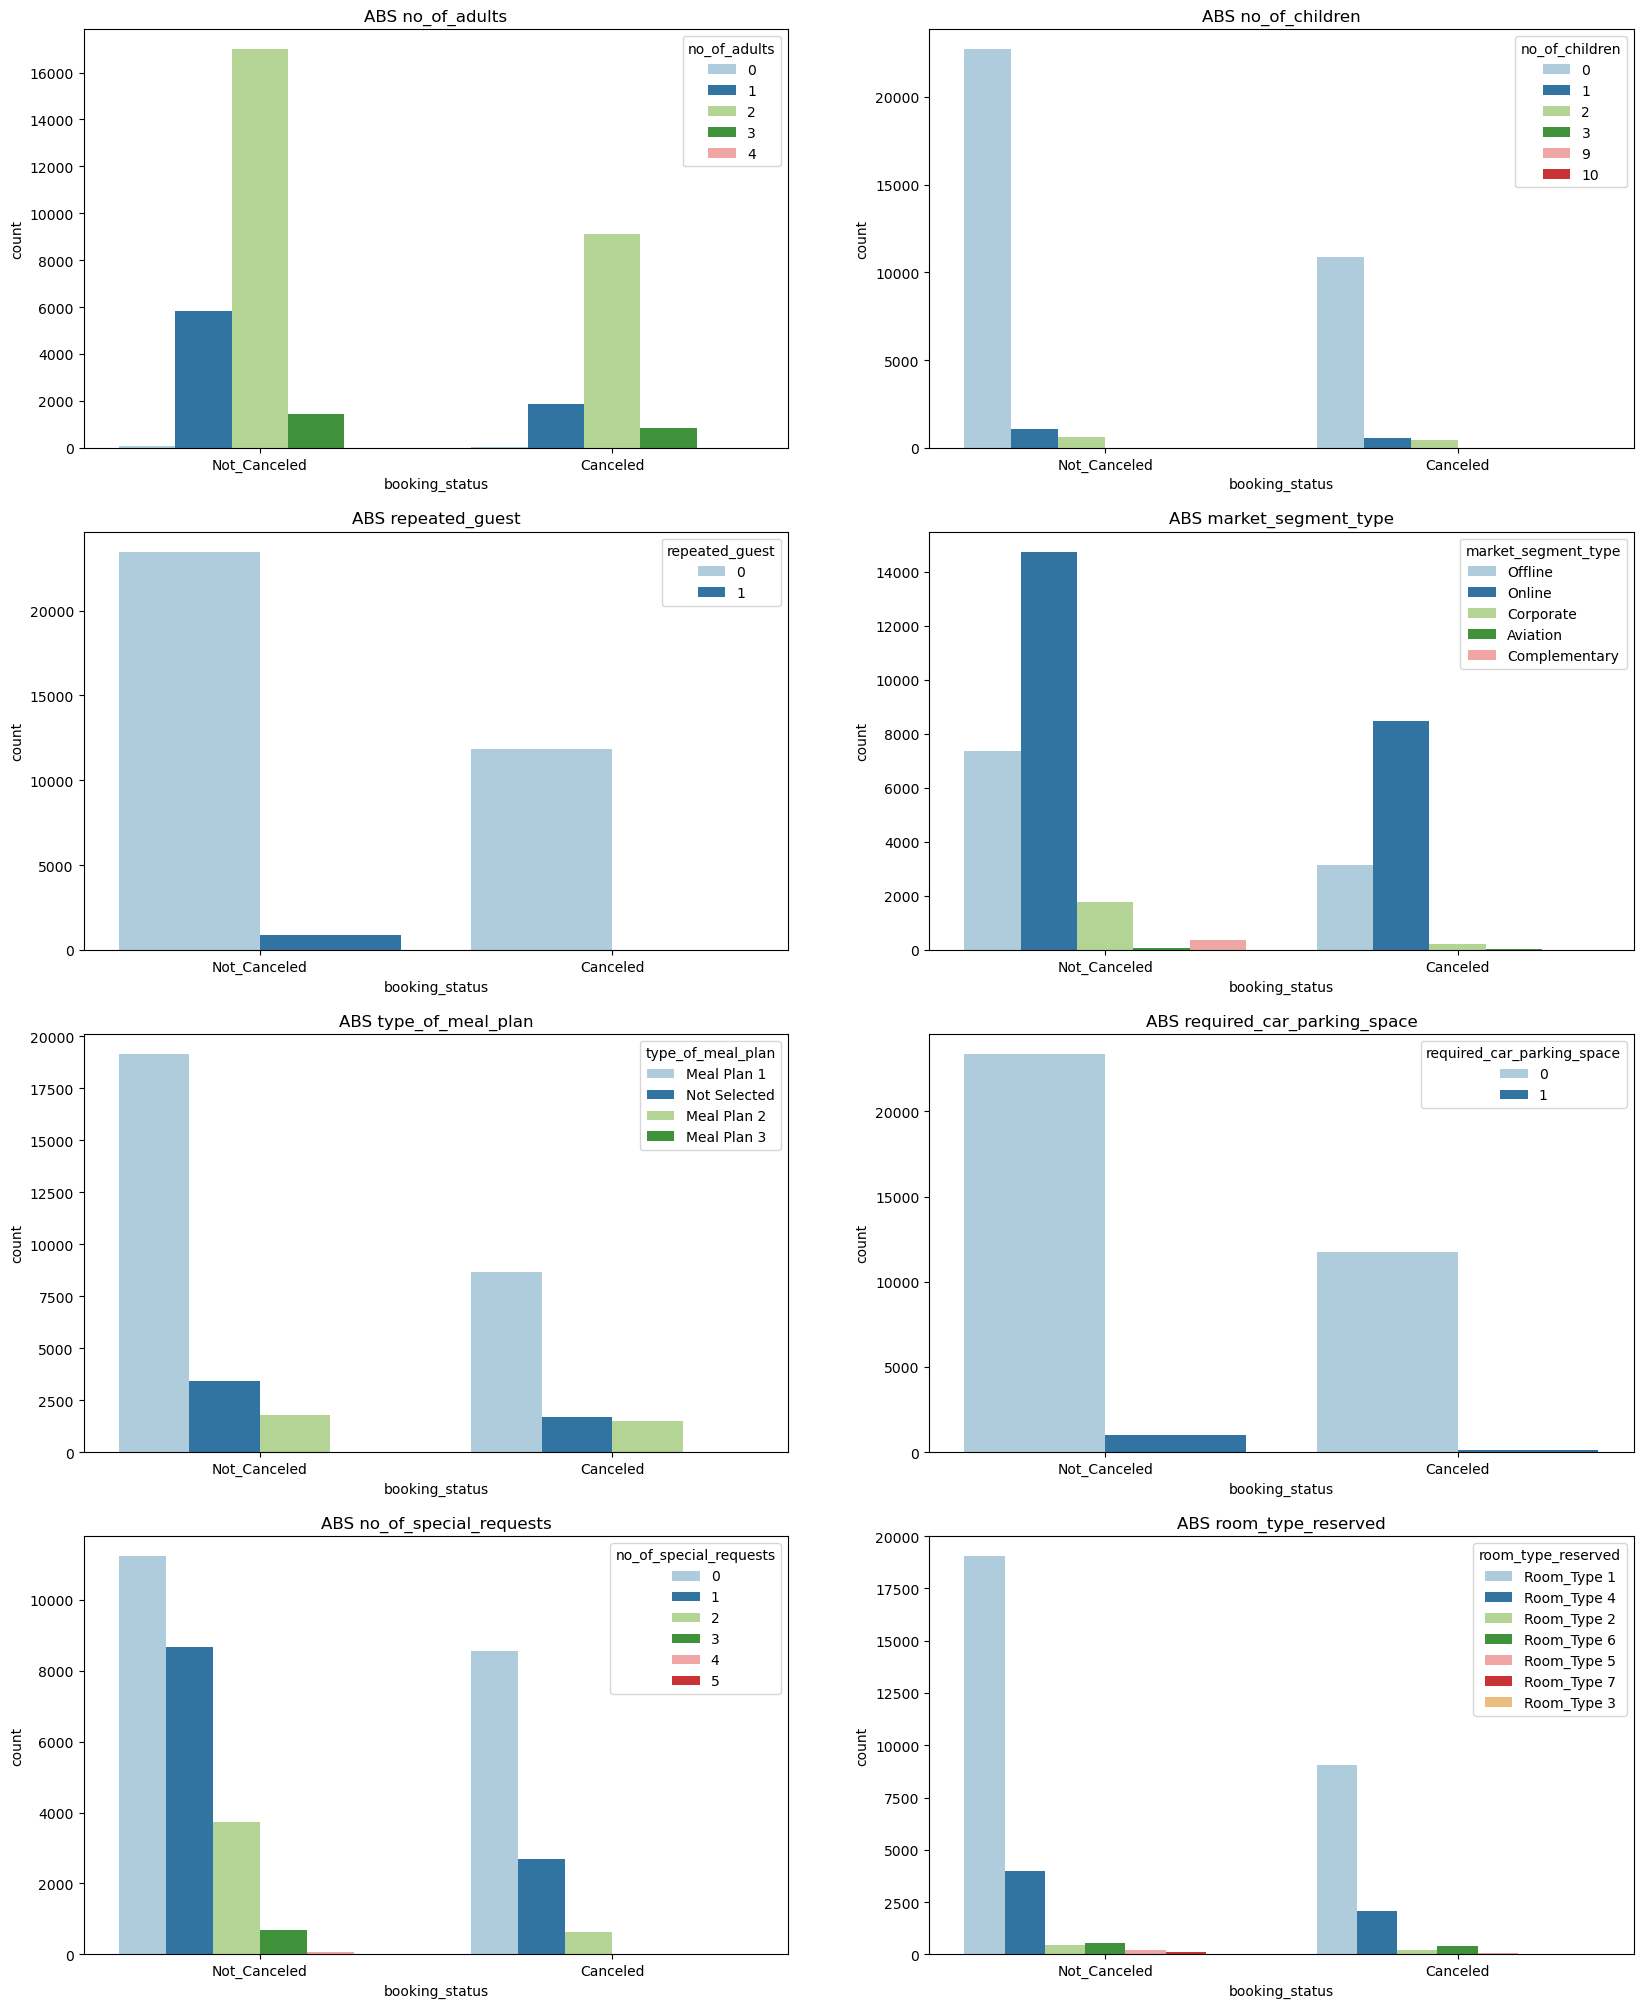

In [10]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('ABS no_of_adults')
sns.countplot(x = 'booking_status', data = df, palette = 'Paired', hue = 'no_of_adults')

plt.subplot(4,2,2)
plt.gca().set_title('ABS no_of_children')
sns.countplot(x = 'booking_status', data = df, palette = 'Paired', hue = 'no_of_children')

plt.subplot(4,2,3)
plt.gca().set_title('ABS repeated_guest')
sns.countplot(x = 'booking_status', data = df, palette = 'Paired', hue = 'repeated_guest')

plt.subplot(4,2,4)
plt.gca().set_title('ABS market_segment_type')
sns.countplot(x = 'booking_status', data = df, palette = 'Paired', hue = 'market_segment_type')

plt.subplot(4,2,5)
plt.gca().set_title('ABS type_of_meal_plan')
sns.countplot(x = 'booking_status', data = df, palette = 'Paired', hue = 'type_of_meal_plan')

plt.subplot(4,2,6)
plt.gca().set_title('ABS required_car_parking_space')
sns.countplot(x = 'booking_status', data = df, palette = 'Paired',  hue = 'required_car_parking_space')

plt.subplot(4,2,7)
plt.gca().set_title('ABS no_of_special_requests')
sns.countplot(x = 'booking_status', data = df, palette = 'Paired', hue = 'no_of_special_requests')

plt.subplot(4,2,8)
plt.gca().set_title('ABS room_type_reserved')
sns.countplot(x = 'booking_status', data = df, palette = 'Paired', hue = 'room_type_reserved' )


<Axes: title={'center': 'ABS no_of_weekend_nights'}, xlabel='booking_status', ylabel='count'>

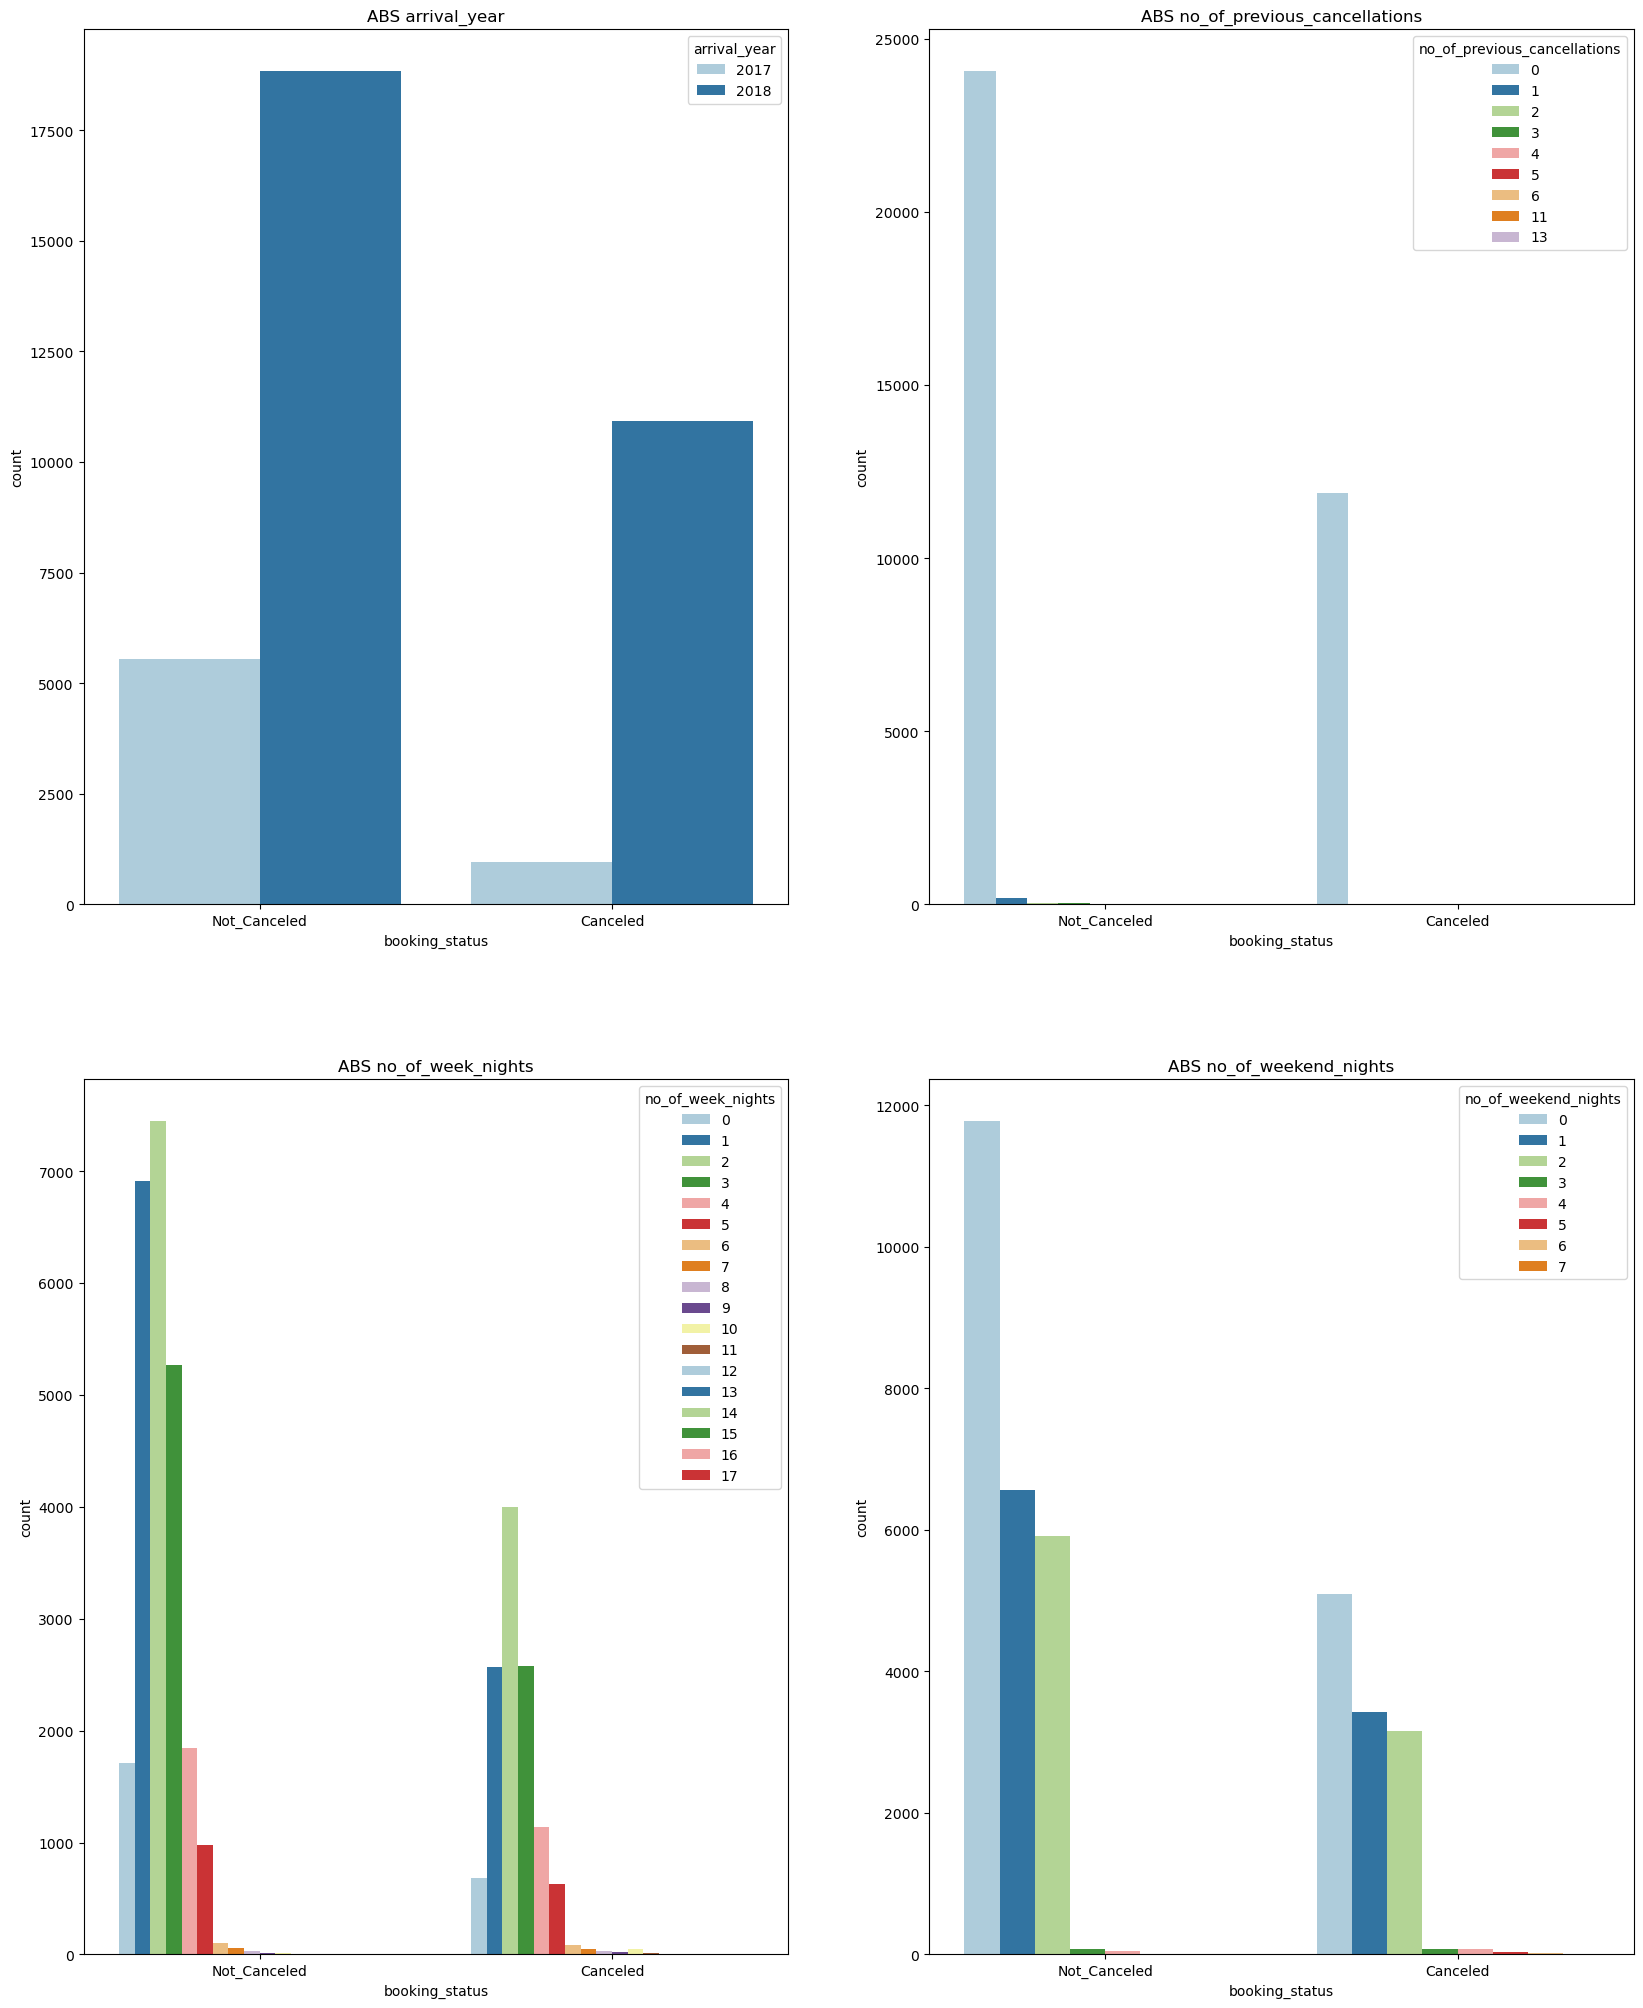

In [11]:
plt.figure(figsize = (20,25))

plt.subplot(2,2,1)
plt.gca().set_title('ABS arrival_year')
sns.countplot(x = 'booking_status', data = df, hue ='arrival_year', palette = 'Paired')

plt.subplot(2,2,2)
plt.gca().set_title('ABS no_of_previous_cancellations')
sns.countplot(x = 'booking_status', data = df, hue ='no_of_previous_cancellations', palette = 'Paired')

plt.subplot(2,2,3)
plt.gca().set_title('ABS no_of_week_nights')
sns.countplot(x = 'booking_status', data = df, hue = 'no_of_week_nights', palette = 'Paired')

plt.subplot(2,2,4)
plt.gca().set_title('ABS no_of_weekend_nights')
sns.countplot(x = 'booking_status', data = df, hue = 'no_of_weekend_nights', palette = 'Paired')

<Axes: title={'center': 'ABS avg_price_per_room'}, xlabel='avg_price_per_room', ylabel='Density'>

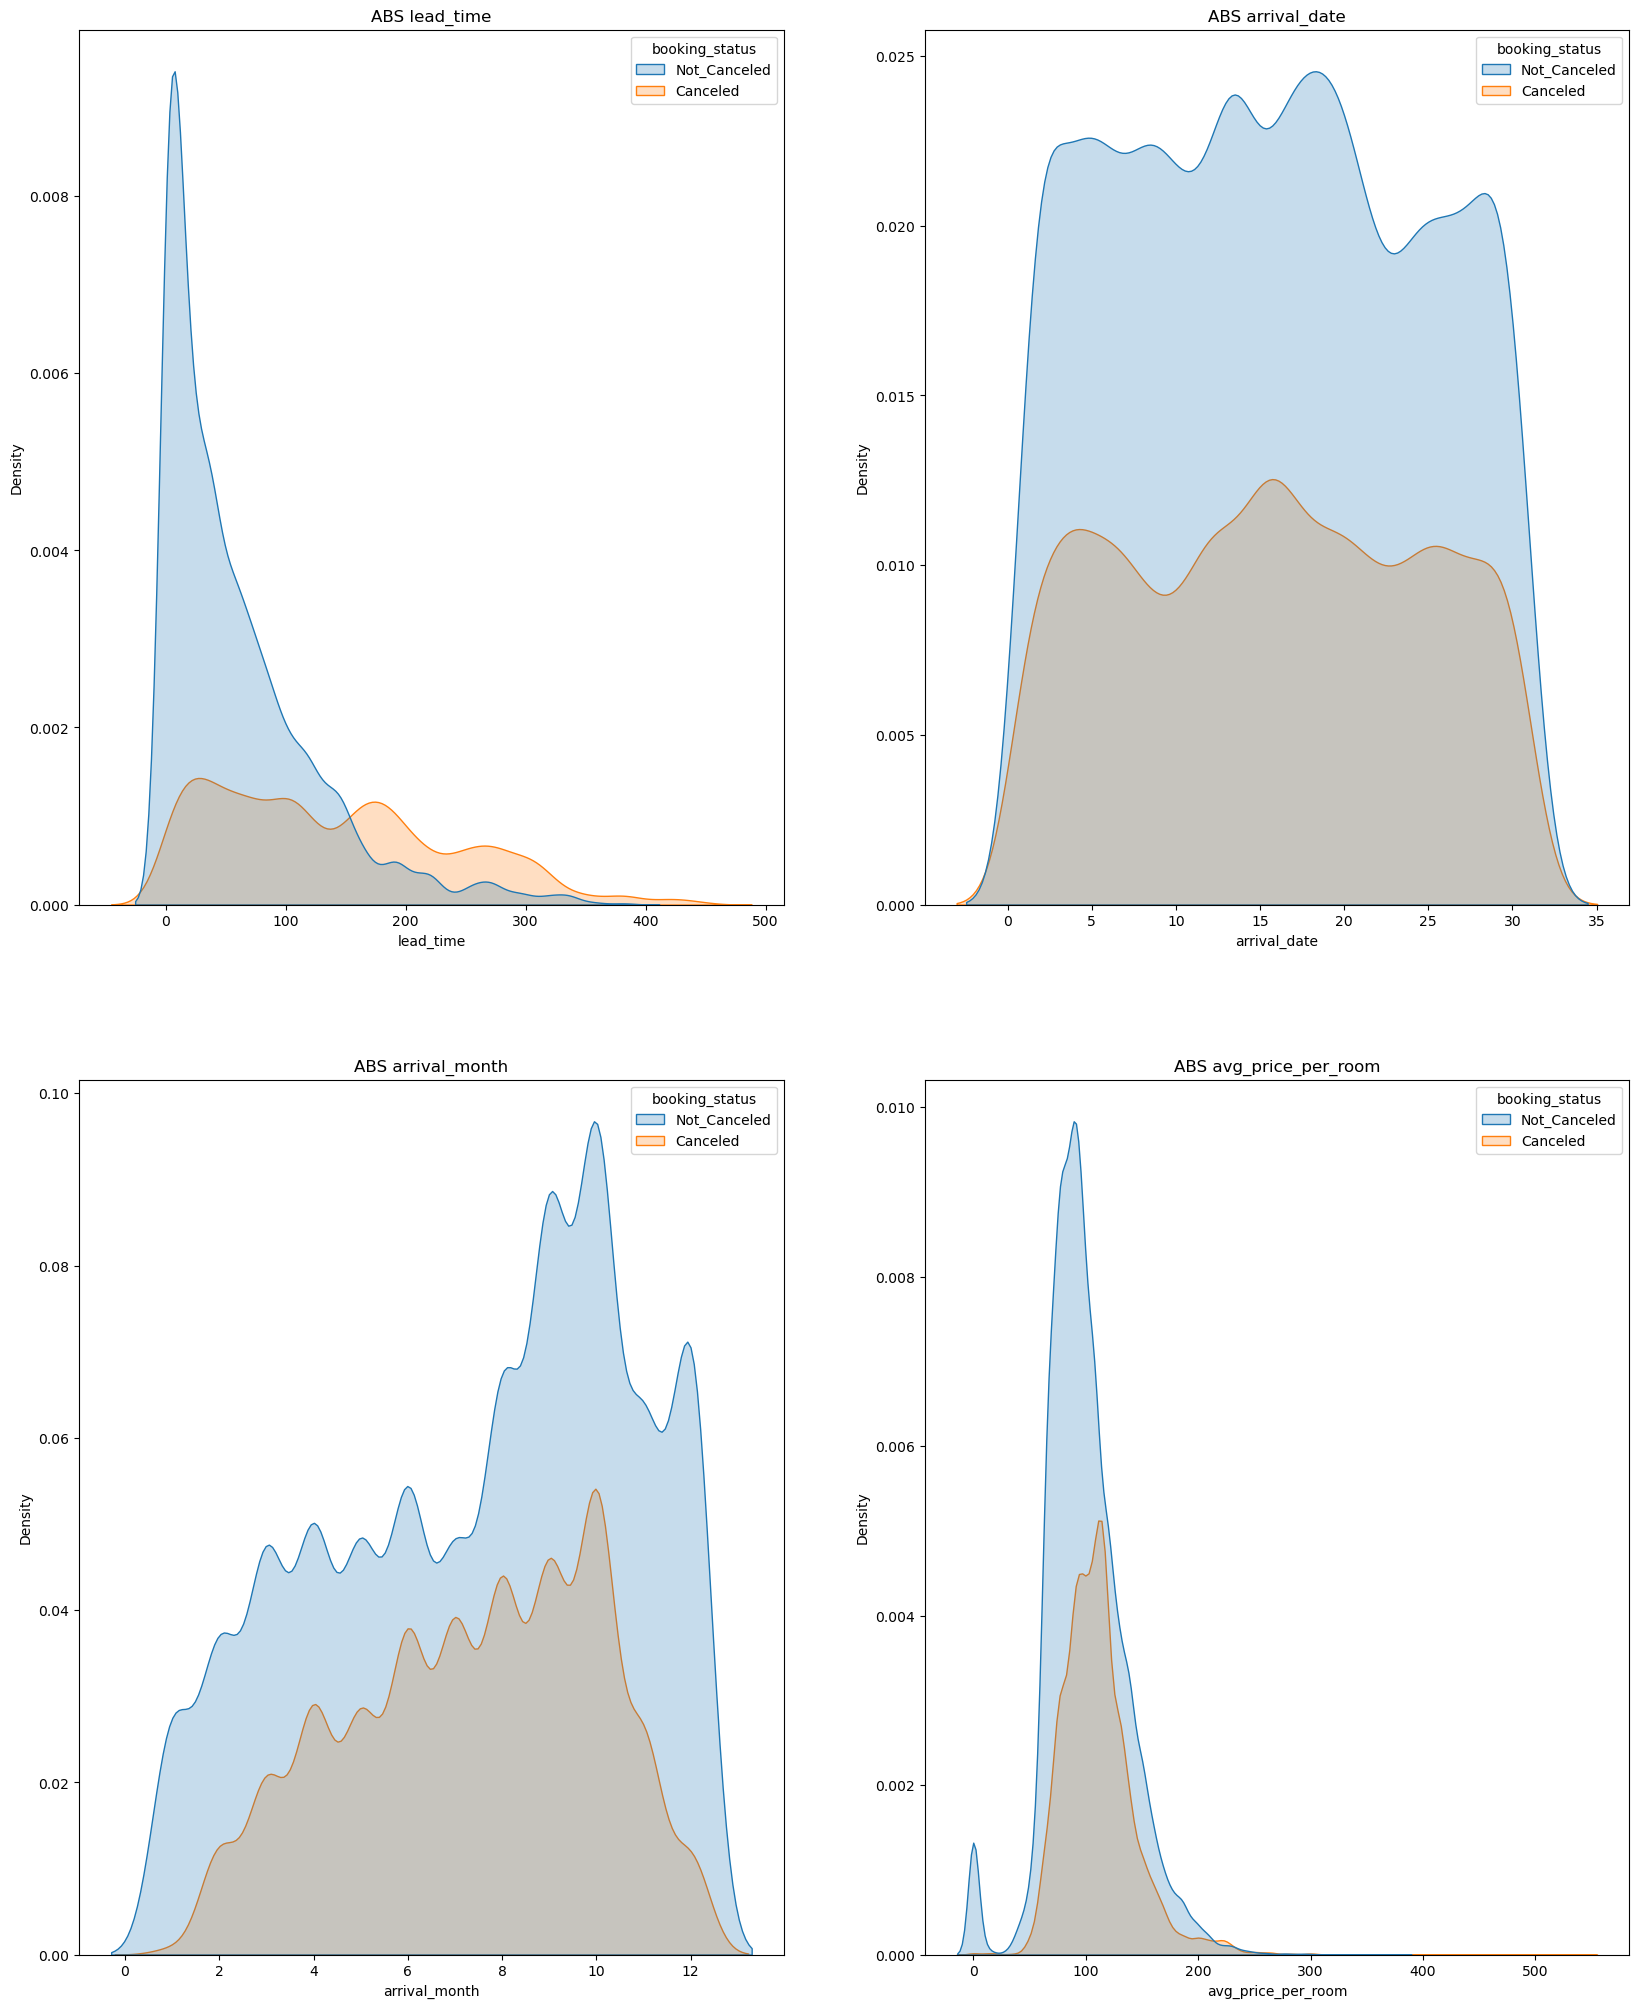

In [12]:
plt.figure(figsize = (20,25))

plt.subplot(2,2,1)
plt.gca().set_title('ABS lead_time')
sns.kdeplot(x = 'lead_time', data = df, hue = 'booking_status', fill=True)

plt.subplot(2,2,2)
plt.gca().set_title('ABS arrival_date')
sns.kdeplot(x = 'arrival_date', data = df, hue = 'booking_status', fill=True)

plt.subplot(2,2,3)
plt.gca().set_title('ABS arrival_month')
sns.kdeplot(x = 'arrival_month', data = df, hue = 'booking_status', fill=True)

plt.subplot(2,2,4)
plt.gca().set_title('ABS avg_price_per_room')
sns.kdeplot(x = 'avg_price_per_room', data = df, hue = 'booking_status', fill=True)

-Base on our chart, the more special request we have, the less guest want to cancel this booking. Beside that, we can see that guest who requested a car parking space and is repeated one, are not usually cancel this booking.

-The fact that the rate of room have the strong affect to guest decision of cancel the booking or not - we have cancellations from most expensive rooms. The longer guests take to book the room, the more tendency they want to cancel the booking which is obviously make sense. One interesting thing we can see that, in 4 last month of the year, we receive less cancellations

-As we can see, the ‘Lead time’ Variable  is the one that had the most differentiations between canceled and non canceled. To go deeper to it, we will move on the next part  - Analysis Leadtime


## ANALYSIS LEAD TIME

<Axes: title={'center': 'ALT no_of_special_requests'}, xlabel='no_of_special_requests', ylabel='lead_time'>

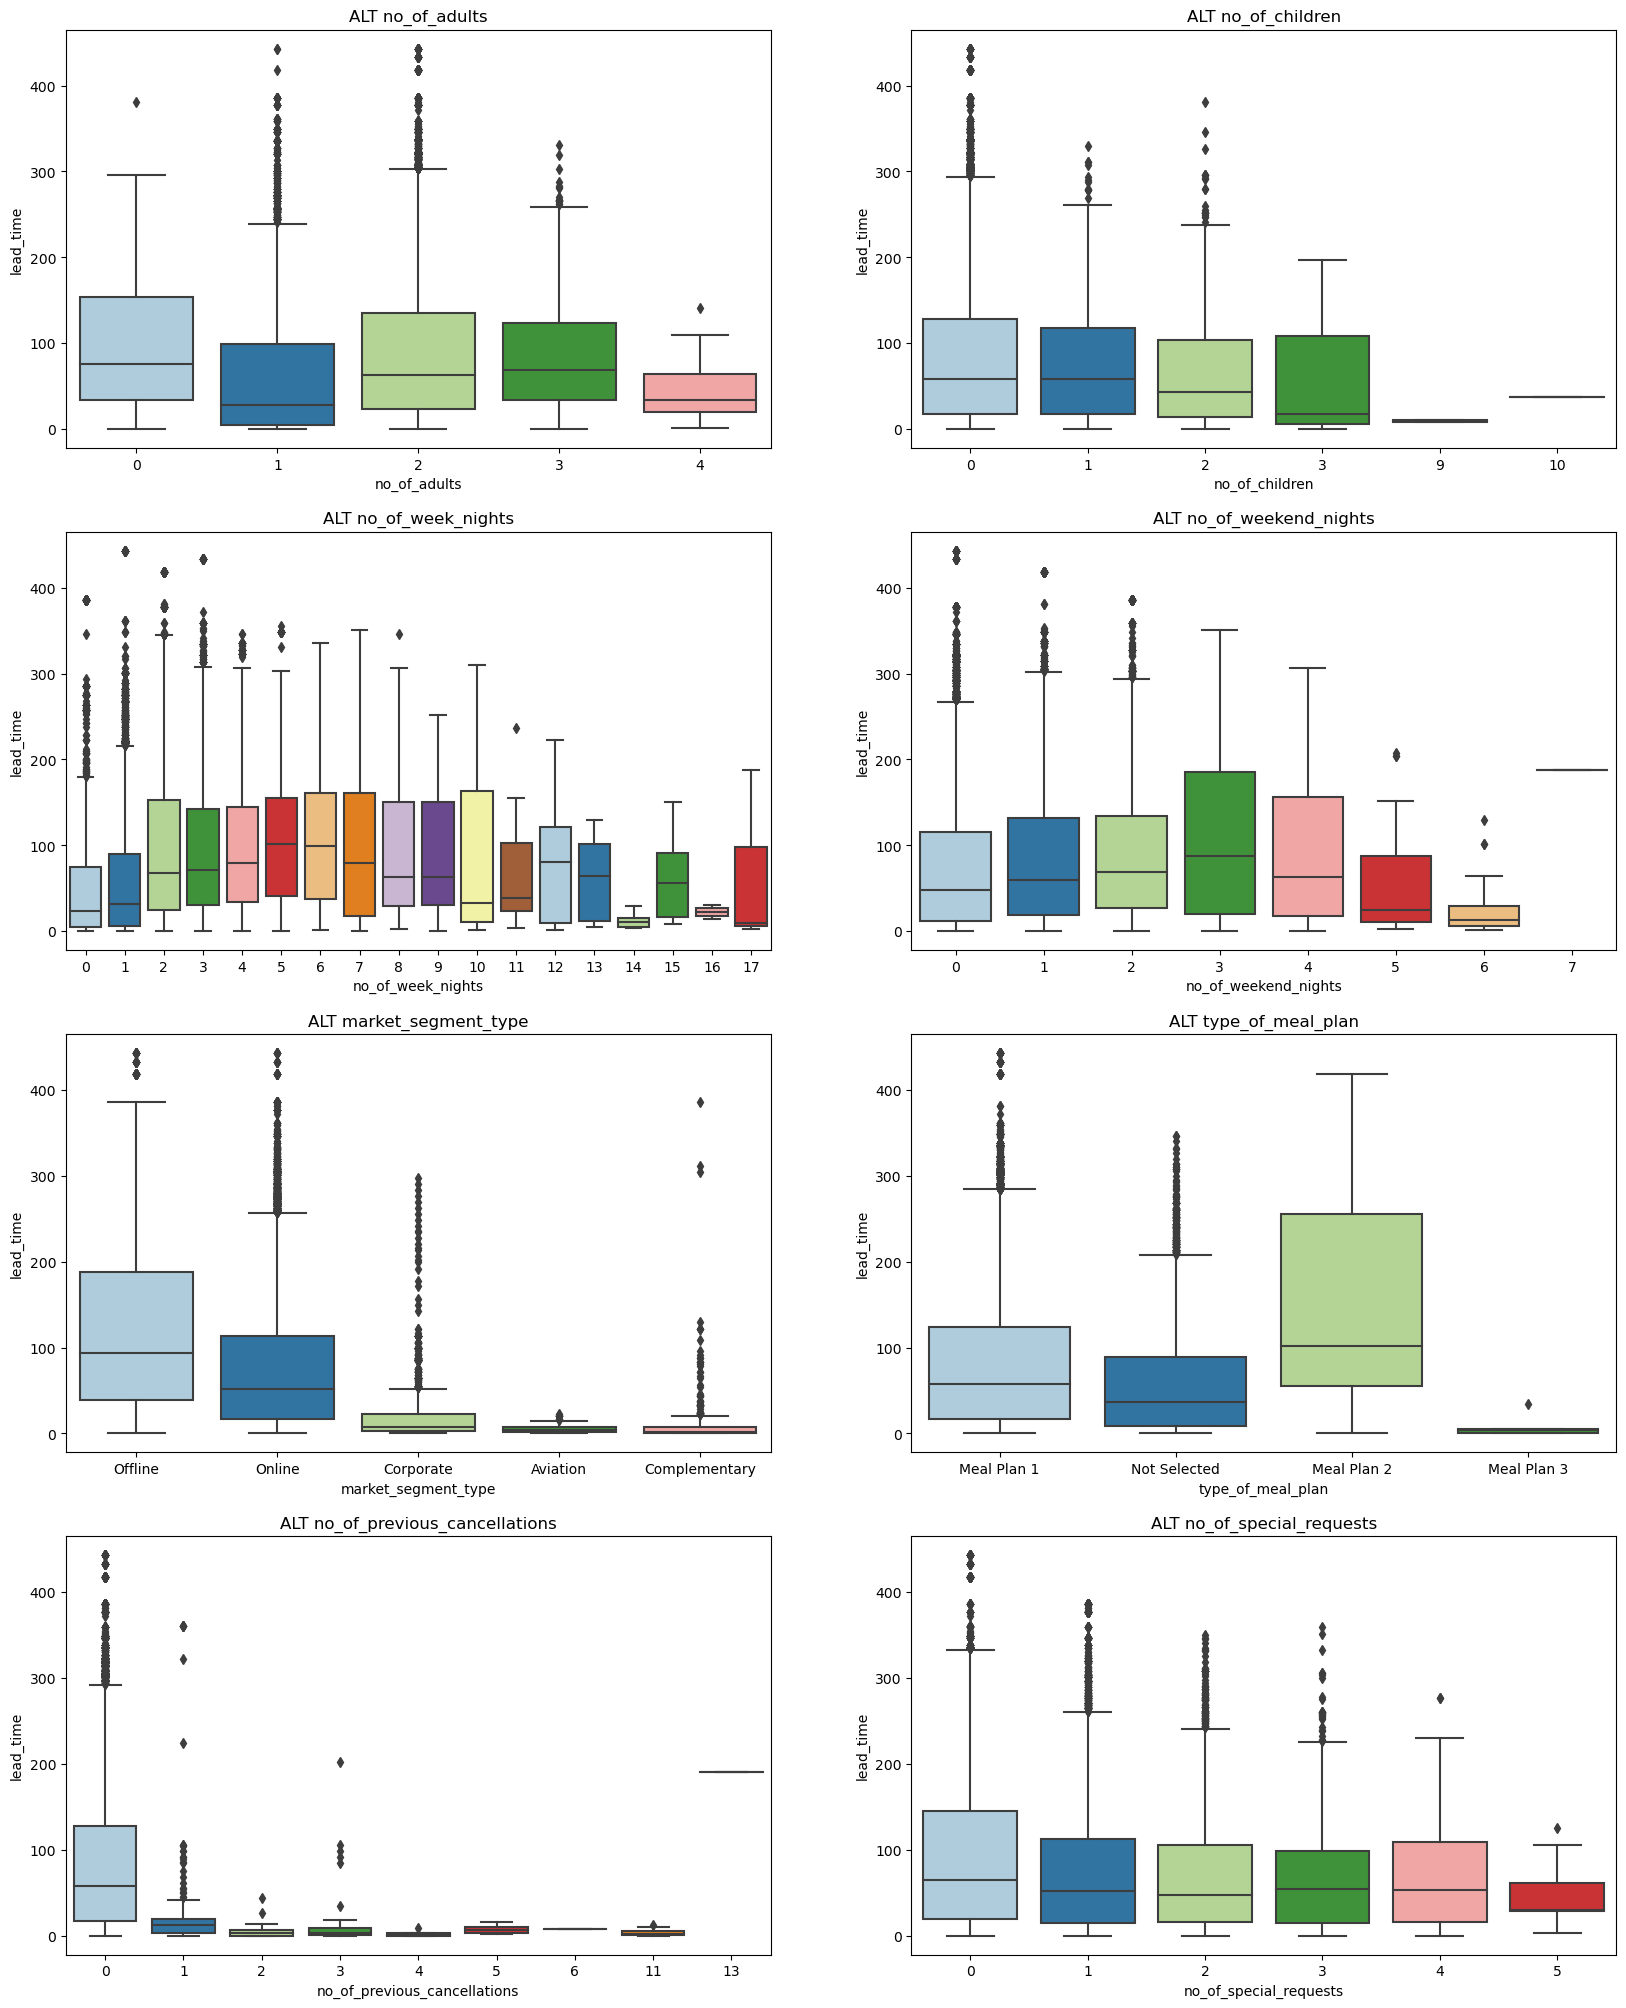

In [13]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('ALT no_of_adults')
sns.boxplot(x = 'no_of_adults', y = 'lead_time', data = df, palette = 'Paired')

plt.subplot(4,2,2)
plt.gca().set_title('ALT no_of_children')
sns.boxplot(x = 'no_of_children', y = 'lead_time', data = df, palette = 'Paired')

plt.subplot(4,2,3)
plt.gca().set_title('ALT no_of_week_nights')
sns.boxplot(x = 'no_of_week_nights', y = 'lead_time', data = df, palette = 'Paired')

plt.subplot(4,2,4)
plt.gca().set_title('ALT no_of_weekend_nights')
sns.boxplot(x = 'no_of_weekend_nights', y = 'lead_time', data = df, palette = 'Paired')

plt.subplot(4,2,5)
plt.gca().set_title('ALT market_segment_type')
sns.boxplot(x = 'market_segment_type', y = 'lead_time', data = df, palette = 'Paired')

plt.subplot(4,2,6)
plt.gca().set_title('ALT type_of_meal_plan')
sns.boxplot(x = 'type_of_meal_plan', y = 'lead_time', data = df, palette = 'Paired')

plt.subplot(4,2,7)
plt.gca().set_title('ALT no_of_previous_cancellations')
sns.boxplot(x = 'no_of_previous_cancellations', y = 'lead_time', data = df, palette = 'Paired')

plt.subplot(4,2,8)
plt.gca().set_title('ALT no_of_special_requests')
sns.boxplot(x = 'no_of_special_requests', y = 'lead_time', data = df, palette = 'Paired')


<Axes: title={'center': 'ALT arrival_year'}, xlabel='lead_time', ylabel='Density'>

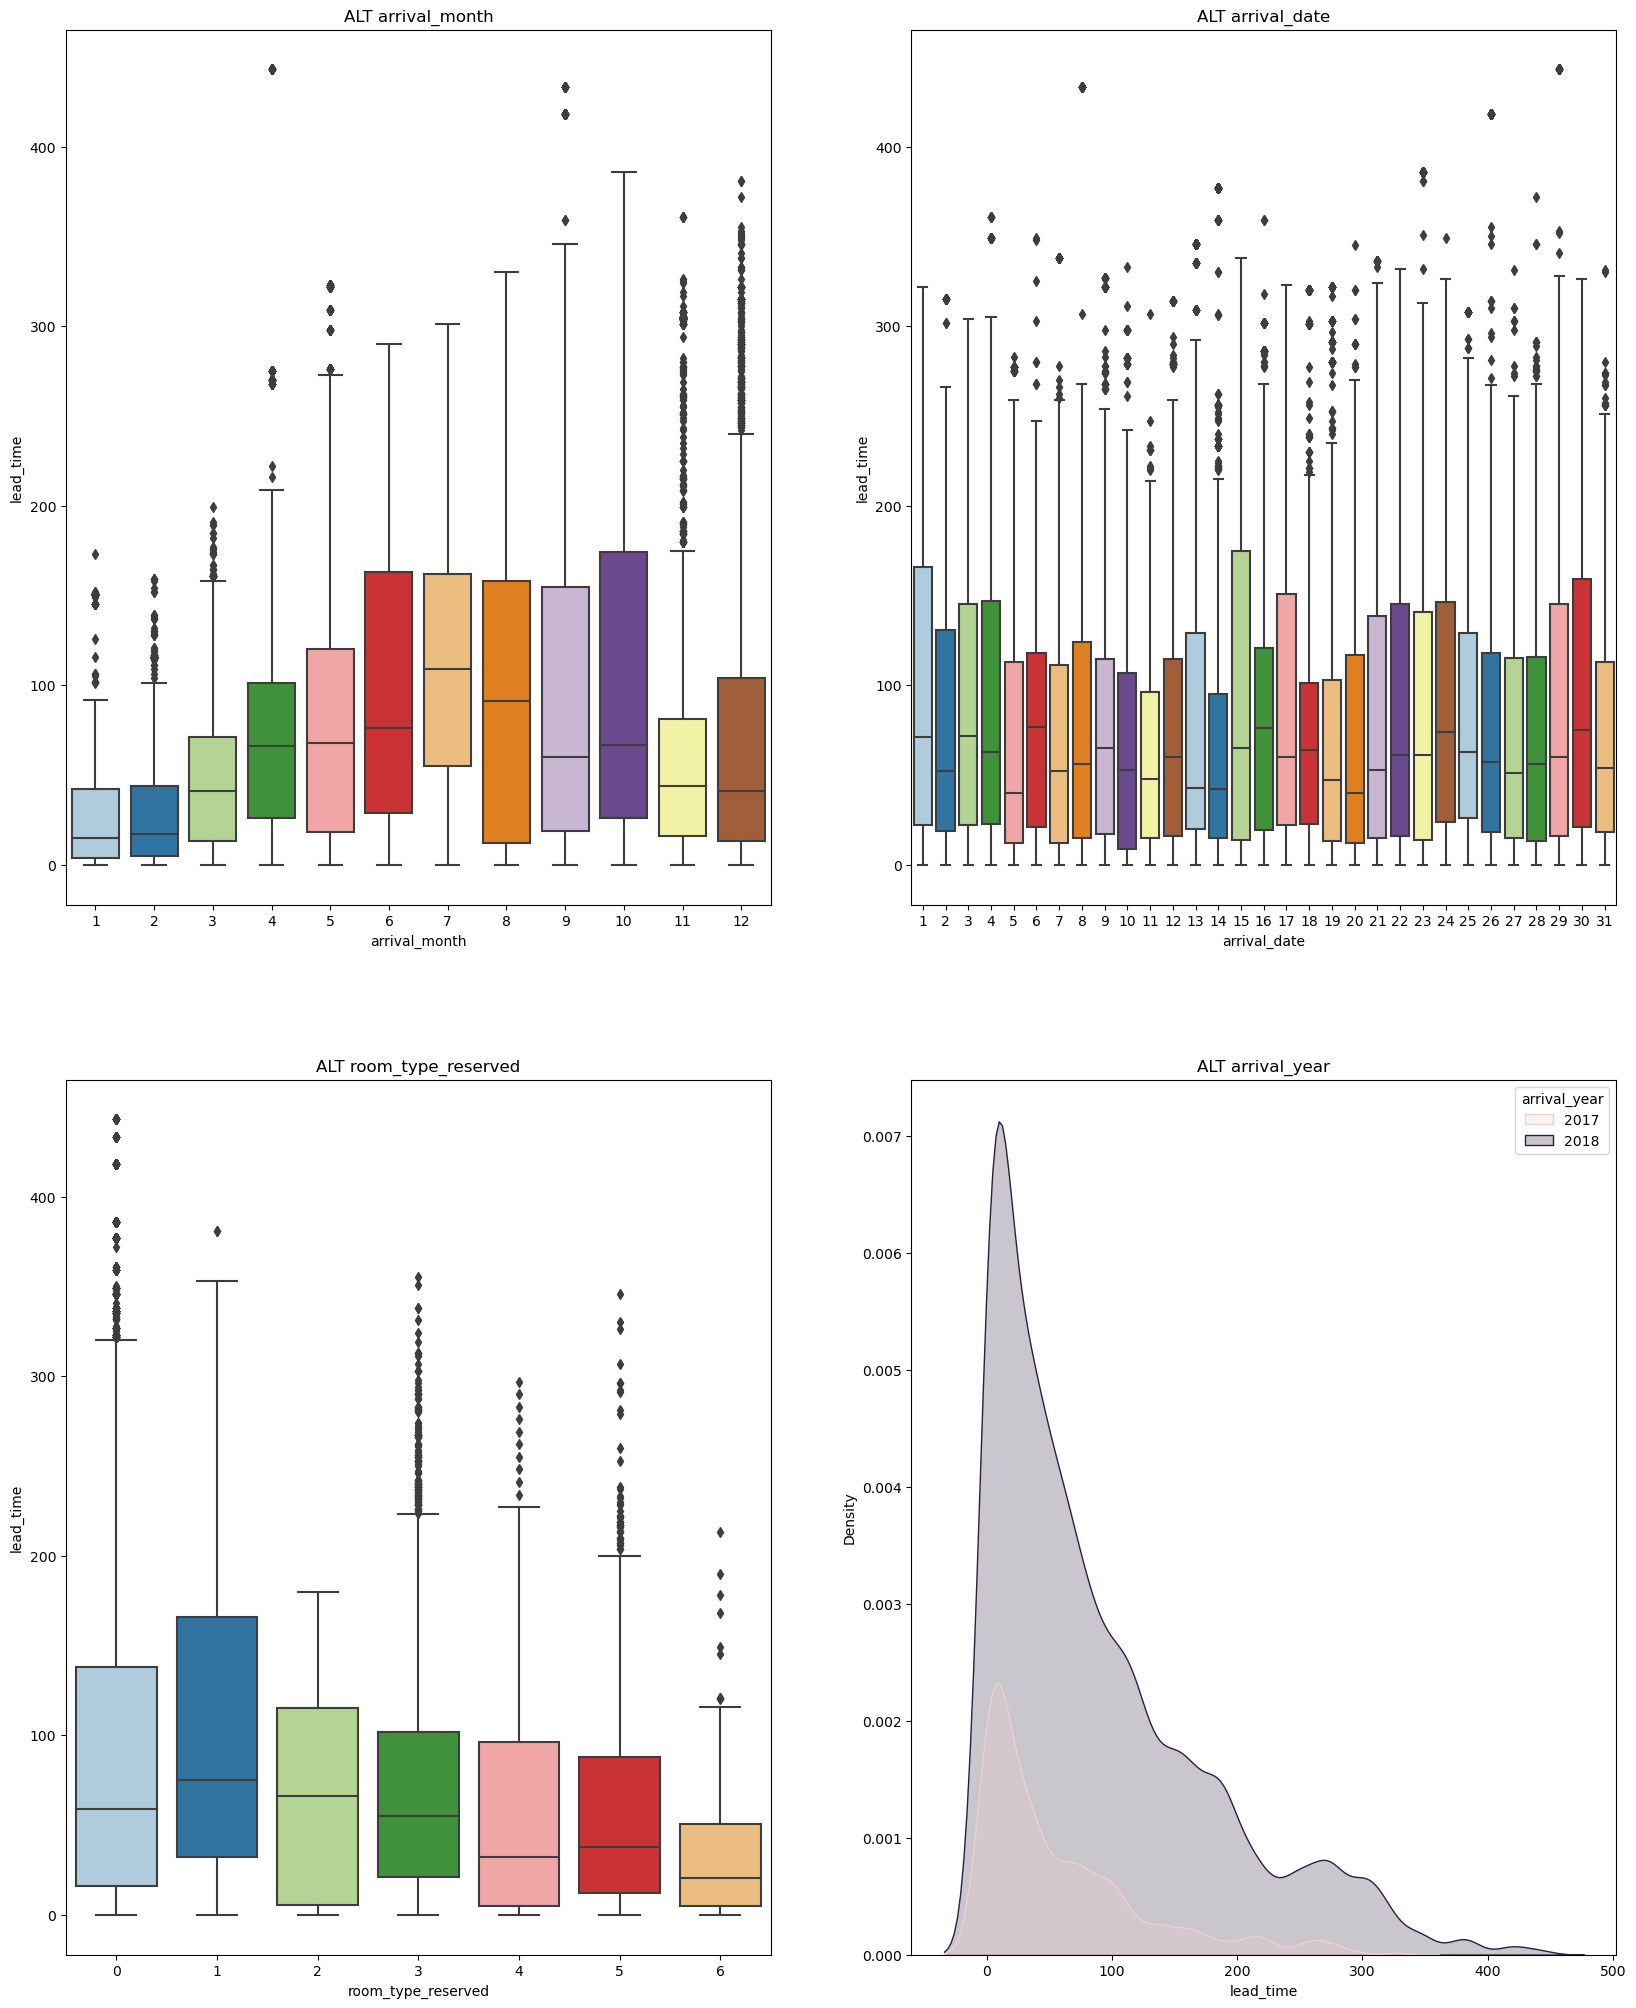

In [49]:
plt.figure(figsize = (20,25))

plt.subplot(2,2,1)
plt.gca().set_title('ALT arrival_month')
sns.boxplot(x = 'arrival_month', y = 'lead_time', data = df, palette = 'Paired')

plt.subplot(2,2,2)
plt.gca().set_title('ALT arrival_date')
sns.boxplot(x = 'arrival_date', y = 'lead_time', data = df, palette = 'Paired')

plt.subplot(2,2,3)
plt.gca().set_title('ALT room_type_reserved')
sns.boxplot(x = 'room_type_reserved', y = 'lead_time', data = df, palette = 'Paired')

plt.subplot(2,2,4)
plt.gca().set_title('ALT arrival_year')
sns.kdeplot(x = 'lead_time', hue = 'arrival_year', data = df, fill= True)


<Axes: title={'center': 'ALT avg_price_per_room'}, xlabel='lead_time', ylabel='avg_price_per_room'>

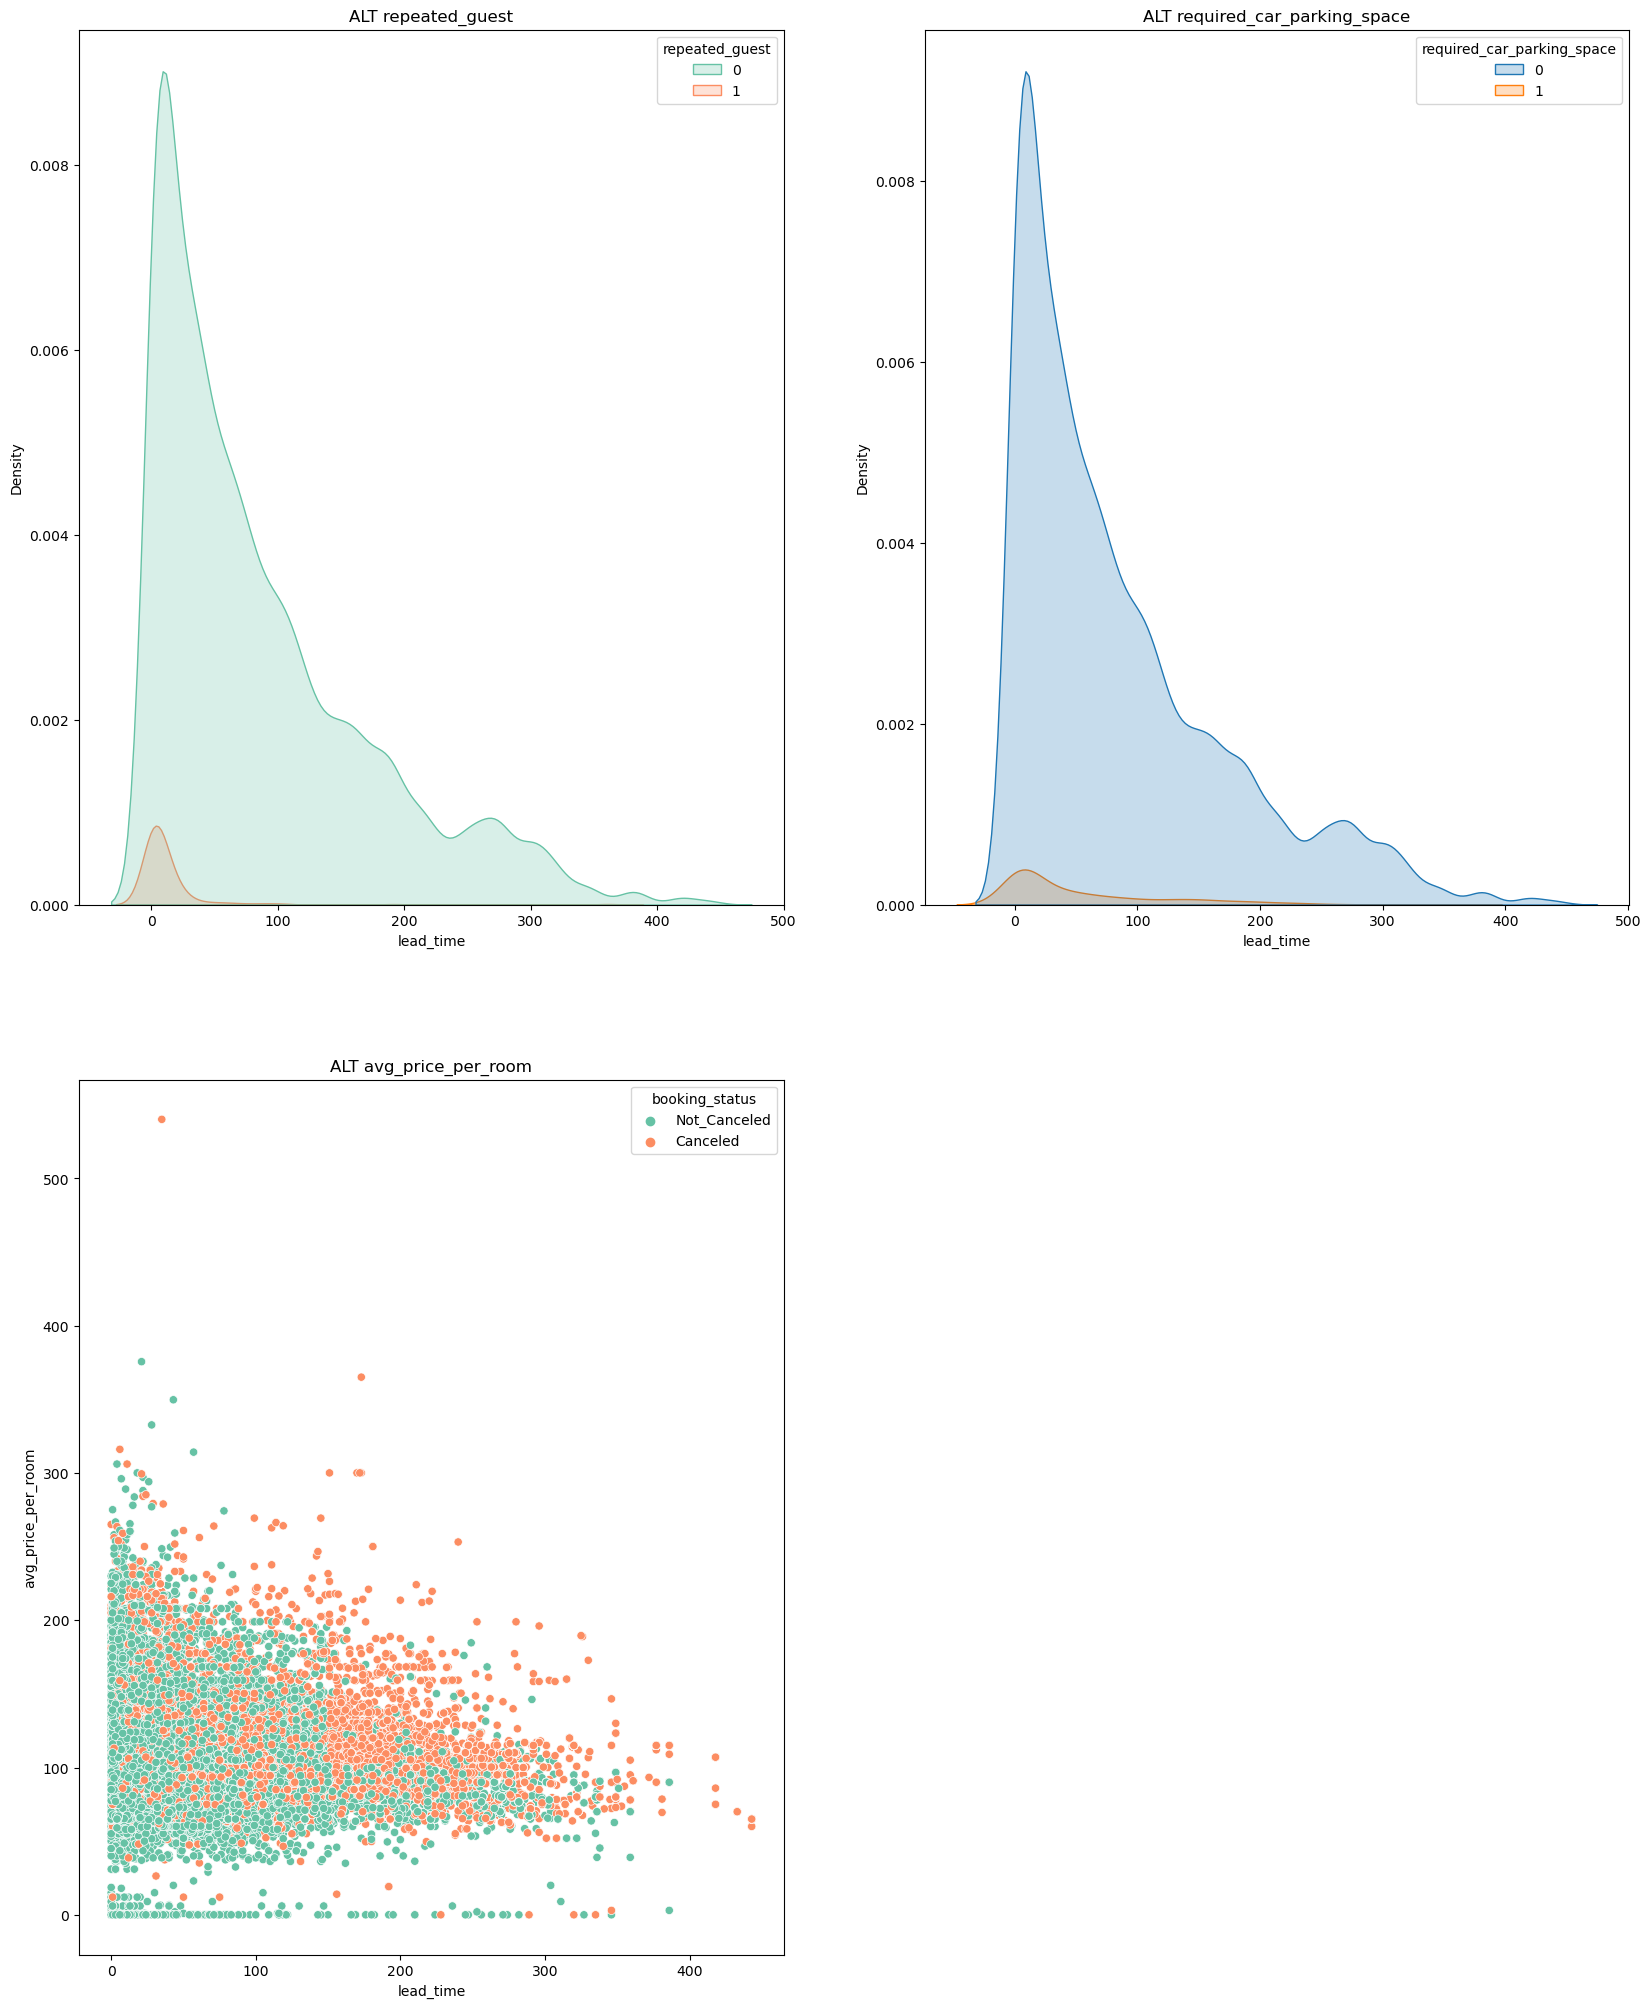

In [15]:
plt.figure(figsize = (20,25))

plt.subplot(2,2,1)
plt.gca().set_title('ALT repeated_guest')
sns.kdeplot(x = 'lead_time', hue = 'repeated_guest', data = df, fill= True, palette = 'Set2')

plt.subplot(2,2,2)
plt.gca().set_title('ALT required_car_parking_space')
sns.kdeplot(x = 'lead_time', hue = 'required_car_parking_space', data = df, fill= True)

plt.subplot(2,2,3)
plt.gca().set_title('ALT avg_price_per_room')
sns.scatterplot(x = 'lead_time', y = 'avg_price_per_room', data = df, hue = 'booking_status', palette = 'Set2')


-Look at our chart, we can easily see that guests who booked Offline and Online, and choose the Meal Plan 2 have the high lead time. One thing interesting that guest have 3-4 weekend nights stay have the longer lead time than normal

-In the begining and the end of the year are months in which the lead time lower than others 

-On room_type_reserverd chart, we can figure out that some room had been choosen faster than normal

-Fun fact, the more special request guests had, the lower lead time for their booking reservation

-In 2018, we have a lot of early booked reservation

-Guest who knew the hotel before or have required car parking space have the very low lead time

# MODEL BUILDING

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
label_encoder_room_type_reserved = LabelEncoder()
label_encoder_market_segment_type = LabelEncoder()
label_encoder_type_of_meal_plan = LabelEncoder()
label_encoder_booking_status = LabelEncoder()

In [18]:
df['room_type_reserved'] = label_encoder_type_of_meal_plan.fit_transform(df['room_type_reserved'])
df['market_segment_type'] = label_encoder_type_of_meal_plan.fit_transform(df['market_segment_type'])
df['type_of_meal_plan'] = label_encoder_type_of_meal_plan.fit_transform(df['type_of_meal_plan'])
df['booking_status'] = label_encoder_type_of_meal_plan.fit_transform(df['booking_status'])

In [19]:
X = df.drop('booking_status', axis =1)
y = df['booking_status']

### Balancing Classes

<Axes: xlabel='booking_status', ylabel='count'>

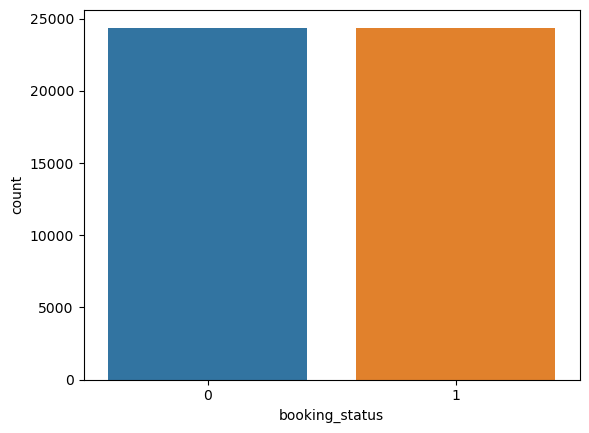

In [21]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=101)
X,y = ros.fit_resample(X,y)
sns.countplot(x=y)

### Standard Scaler

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)
from sklearn.metrics import classification_report, confusion_matrix

## LOGISTIC REGRESSION

In [25]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
predlr = logistic.predict(X_test)

/Users/tranbaotran/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [26]:
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
logistic_score = logistic.score(X_test,y_test)
logistic_score

[[5552 1671]
 [1637 5774]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      7223
           1       0.78      0.78      0.78      7411

    accuracy                           0.77     14634
   macro avg       0.77      0.77      0.77     14634
weighted avg       0.77      0.77      0.77     14634



0.7739510728440617

## DECISION TREE

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred_dtree = dtree.predict(X_test)

In [28]:
print(confusion_matrix(y_test,pred_dtree))
print(classification_report(y_test,pred_dtree))
dtree_score = dtree.score(X_test,y_test)
dtree_score

[[6785  438]
 [ 854 6557]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7223
           1       0.94      0.88      0.91      7411

    accuracy                           0.91     14634
   macro avg       0.91      0.91      0.91     14634
weighted avg       0.91      0.91      0.91     14634



0.9117124504578379

In [29]:
columns = df.drop('booking_status', axis = 1).columns
feature_ipt = pd.Series(dtree.feature_importances_, index = columns).sort_values(ascending = False)
feature_ipt

lead_time                               0.353121
avg_price_per_room                      0.137623
market_segment_type                     0.107570
no_of_special_requests                  0.090020
arrival_date                            0.082229
arrival_month                           0.069755
no_of_week_nights                       0.041721
no_of_weekend_nights                    0.041436
no_of_adults                            0.027217
type_of_meal_plan                       0.012673
room_type_reserved                      0.011707
arrival_year                            0.010404
required_car_parking_space              0.007898
no_of_children                          0.005441
repeated_guest                          0.001057
no_of_previous_cancellations            0.000095
no_of_previous_bookings_not_canceled    0.000034
dtype: float64

## RANDOM FOREST

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['entropy', 'gini'],
                         'max_depth': [ 3,  4,  5,  6,  7,  9, 11],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [100]} 
gridrfc = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3)

In [32]:
gridrfc.fit(X_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=100;, score=0.785 total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=100;, score=0.785 total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=100;, score=0.775 total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=100;, score=0.769 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=100;, score=0.775 total time=   0.5s
[CV 1/5] END criterion=entropy, max_depth=3, min_samples_split=3, n_estimators=100;, score=0.793 total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=3, min_samples_split=3, n_estimators=100;, score=0.792 total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=3, min_samples_split=3, n_estimators=100;, score=0.780 total time=   0.5s
[CV 4/5] E

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6, 7, 9, 11],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [100]},
             verbose=3)

In [33]:
gridrfc_pred = gridrfc.predict(X_test)
print(confusion_matrix(y_test,gridrfc_pred))
print(classification_report(y_test,gridrfc_pred))
rfc_score = gridrfc.score(X_test,y_test)
rfc_score

[[5950 1273]
 [ 647 6764]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      7223
           1       0.84      0.91      0.88      7411

    accuracy                           0.87     14634
   macro avg       0.87      0.87      0.87     14634
weighted avg       0.87      0.87      0.87     14634



0.8687986879868799

In [34]:
feature_ipt = pd.Series(rfc.feature_importances_, index = columns).sort_values(ascending = False)
feature_ipt

lead_time                               0.310393
avg_price_per_room                      0.149845
no_of_special_requests                  0.115279
arrival_date                            0.090727
arrival_month                           0.084265
market_segment_type                     0.059634
no_of_week_nights                       0.049130
no_of_weekend_nights                    0.036583
arrival_year                            0.028204
no_of_adults                            0.023792
type_of_meal_plan                       0.016303
room_type_reserved                      0.015616
required_car_parking_space              0.007992
no_of_children                          0.007068
repeated_guest                          0.003012
no_of_previous_bookings_not_canceled    0.001914
no_of_previous_cancellations            0.000243
dtype: float64

## EXTRA TREES

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train,y_train)
param_grid = {'criterion': ['entropy', 'gini'],
                         'n_estimators': [100]} 
gridetc = GridSearchCV(ExtraTreesClassifier(),param_grid,refit=True,verbose=3)
gridetc.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END criterion=entropy, n_estimators=100;, score=0.927 total time=   1.5s
[CV 2/5] END criterion=entropy, n_estimators=100;, score=0.924 total time=   1.5s
[CV 3/5] END criterion=entropy, n_estimators=100;, score=0.923 total time=   1.4s
[CV 4/5] END criterion=entropy, n_estimators=100;, score=0.922 total time=   1.4s
[CV 5/5] END criterion=entropy, n_estimators=100;, score=0.924 total time=   1.5s
[CV 1/5] END ..criterion=gini, n_estimators=100;, score=0.925 total time=   1.4s
[CV 2/5] END ..criterion=gini, n_estimators=100;, score=0.924 total time=   1.4s
[CV 3/5] END ..criterion=gini, n_estimators=100;, score=0.922 total time=   1.4s
[CV 4/5] END ..criterion=gini, n_estimators=100;, score=0.922 total time=   1.4s
[CV 5/5] END ..criterion=gini, n_estimators=100;, score=0.926 total time=   1.4s


GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': [100]},
             verbose=3)

In [36]:
gridetc_pred = gridetc.predict(X_test)
print(confusion_matrix(y_test,gridetc_pred))
print(classification_report(y_test,gridetc_pred))
etc_score = gridetc.score(X_test,y_test)
etc_score

[[6790  433]
 [ 561 6850]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7223
           1       0.94      0.92      0.93      7411

    accuracy                           0.93     14634
   macro avg       0.93      0.93      0.93     14634
weighted avg       0.93      0.93      0.93     14634



0.932075987426541

In [37]:
feature_ipt = pd.Series(etc.feature_importances_, index = columns).sort_values(ascending = False)
featu- re_ipt

lead_time                               0.275351
avg_price_per_room                      0.117306
no_of_special_requests                  0.116661
arrival_month                           0.094294
arrival_date                            0.091839
no_of_week_nights                       0.064501
market_segment_type                     0.055554
no_of_weekend_nights                    0.044987
arrival_year                            0.035291
no_of_adults                            0.032555
type_of_meal_plan                       0.023250
room_type_reserved                      0.019876
no_of_children                          0.010093
required_car_parking_space              0.008808
repeated_guest                          0.007807
no_of_previous_bookings_not_canceled    0.001485
no_of_previous_cancellations            0.000341
dtype: float64

## K NEAREST NEIGHBORS

In [38]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},

gridknn = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=3)
gridknn.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.853 total time=   0.3s
[CV 2/5] END .....................n_neighbors=1;, score=0.852 total time=   0.2s
[CV 3/5] END .....................n_neighbors=1;, score=0.859 total time=   0.2s
[CV 4/5] END .....................n_neighbors=1;, score=0.860 total time=   0.2s
[CV 5/5] END .....................n_neighbors=1;, score=0.857 total time=   0.2s
[CV 1/5] END .....................n_neighbors=2;, score=0.810 total time=   0.2s
[CV 2/5] END .....................n_neighbors=2;, score=0.810 total time=   0.2s
[CV 3/5] END .....................n_neighbors=2;, score=0.806 total time=   0.2s
[CV 4/5] END .....................n_neighbors=2;, score=0.809 total time=   0.2s
[CV 5/5] END .....................n_neighbors=2;, score=0.805 total time=   0.2s
[CV 1/5] END .....................n_neighbors=3;, score=0.812 total time=   0.2s
[CV 2/5] END .....................n_neighbors=3;,

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=({'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},),
             verbose=3)

In [39]:
gridknn_pred = gridknn.predict(X_test)
print(confusion_matrix(y_test,gridknn_pred))
print(classification_report(y_test,gridknn_pred))
knn_score = gridknn.score(X_test,y_test)
knn_score

[[6579  644]
 [1227 6184]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      7223
           1       0.91      0.83      0.87      7411

    accuracy                           0.87     14634
   macro avg       0.87      0.87      0.87     14634
weighted avg       0.87      0.87      0.87     14634



0.8721470548038813

## K MEANS CLUSTERING

In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 2, random_state=101)
kmeans.fit(X_train)
kmeans_pred = kmeans.predict(X_test)

/Users/tranbaotran/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [41]:
from sklearn.metrics import accuracy_score
kmeans_score = accuracy_score(y_test, kmeans_pred)
kmeans_score

0.31843651769851034

# CHECKING KEY VARIABLES  - CHI 2

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = X
target = y

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(columns),columns = ['Chi Squared Score'])


In [43]:
featureScores.sort_values(by= ['Chi Squared Score'],ascending = False)

,Chi Squared Score
lead_time,791151.637780
avg_price_per_room,13127.173838
no_of_previous_bookings_not_canceled,5367.404145
no_of_special_requests,4028.586442
repeated_guest,822.329810
no_of_previous_cancellations,505.320988
required_car_parking_space,479.173216
no_of_week_nights,445.342962
no_of_weekend_nights,187.777588
market_segment_type,136.678499


In [44]:
Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':dtree_score}

Random_dict = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':rfc_score}

Extra_dict = {'Model':'Extra Trees',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':etc_score}

K_Means_dict_v2 = {'Model':'Means',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':kmeans_score}

KNN_dict_v2 = {'Model':'KNN',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':knn_score}

Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':logistic_score}

final = pd.DataFrame({'Logistic Regression':pd.Series(Logistic_dict_v1),
                    'Decision Tree':pd.Series(Decision_dict),
                    'Random Forest':pd.Series(Random_dict),
                    'Extra Trees':pd.Series(Extra_dict),
                    'K-Means':pd.Series(K_Means_dict_v2),
                    'KNN':pd.Series(KNN_dict_v2),
                      })

In [45]:
final

,Logistic Regression,Decision Tree,Random Forest,Extra Trees,K-Means,KNN
Model,Logistic Regression,Decision Tree,Random Forest,Extra Trees,Means,KNN
Scaling,Normal Data,Normal Data,Normal Data,Normal Data,Normal,Normal
Type,-,Gini,Gini,Gini,-,-
Precision,0.773951,0.911712,0.868799,0.932076,0.318437,0.872147


# CONCLUSION

As I mentioned before, when we look at the targer variables, the ‘Lead time’ Variable  is the one that had the most differentiations between canceled and non canceled, with the high lead time, they more likely to cancel the booking. 

We can also find out that guest who stayed with hotel previously, make special requests and required car parking space are less likely cancel

In ALT I have figure some specificities: guests who had the same specifed type of meal plan have a longer lead time, and in the first 3 and last 3 months of the year we can see the lower lead time. Moreover, when we compare it with avg rate of the room we can see the higher rate, the longer leadtime, the more likely cancellations hotel had
Move on to the Machine Learning, when we running the model, there was some models no good and some models are good, but the best one is Extra Tree with 93,21% accuracy. 

The Feature Importances and the Feature Score  - Chi 2  we had before had pointed out that lead_time, avg_price_per_room, no_of_special_requests are most crucially effect to the final result of the data which we had figure out before